IMPORTRING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import scipy.stats as stats

IMPORTING DATASET

In [2]:
df = pd.read_csv('/content/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0              2.41461          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN              1.92500                 NaN   
904  ...                    NaN              2.05400                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [3]:
# Let's define primary_fuel as fuel_type to understand the dataset better
df.rename(columns={'primary_fuel':'Fuel_Type'}, inplace=True)

In [4]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude Fuel_Type other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407     Solar         NaN         NaN  ...   
1   24.7663    74.6090      Coal         NaN         NaN  ...   
2   21.9038    69.3732      Wind         NaN         NaN  ...   
3   23.8712    91.3602       Gas         NaN         NaN  ...   
4   21.9603    82.4091      Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0              2.41461          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

EXPLORATORY DATA ANALYSIS

In [5]:
df.shape

(907, 27)

In [6]:
# checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
# checking the number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         394
generation_gwh_2014         374
generation_gwh_2015         399
generation_gwh_2016         404
generation_gwh_2017         409
generation_gwh_2018         412
generation_gwh_2019           1
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [9]:
# checking the count of the country
df['country'].value_counts()

country
IND    907
Name: count, dtype: int64

In [10]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [11]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'Fuel_Type', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

In [12]:
# dropping irrelevant columns
df.drop(columns=['name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'Fuel_Type', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],axis=1,inplace=True)

In [13]:
# Reload your DataFrame or avoid dropping the 'name' column earlier.
# If you have the original data file, read it again:
df = pd.read_csv('/content/database_IND.csv')  # Replace 'your_data_file.csv' with the actual file name

# If you don't have the original file, you can't recover the 'name' column.
# In that case, adjust your analysis to not rely on the dropped column.

In [14]:
# checking the count of name
df['name'].value_counts()

name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: count, Length: 907, dtype: int64

In [15]:
df.drop(['name'],axis=1,inplace=True)

In [16]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64

In [17]:
df.drop(['gppd_idnr'],axis=1,inplace=True)

In [18]:
df.drop('owner',axis=1,inplace=True)

In [19]:
df.drop('url',axis=1,inplace=True)

In [20]:
# checking the null values in the dataframe
df.isnull().sum()

country                       0
country_long                  0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
source                        0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

<Axes: >

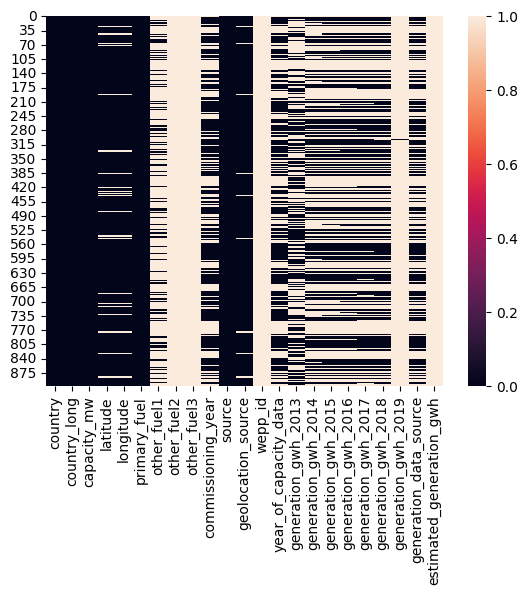

In [21]:
# let's visualize the null values clearly
sns.heatmap(df.isnull())

In [22]:
# Convert relevant columns to numeric type if they should be numeric
# For example, if 'country' should be numeric, you can try:
df['country'] = pd.to_numeric(df['country'], errors='coerce')

# Calculate skewness, ignoring non-numeric columns
df.select_dtypes(include=['float', 'int']).skew()

country                          NaN
capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.063420
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013         6.251847
generation_gwh_2014         3.367455
generation_gwh_2015         3.691868
generation_gwh_2016         3.534216
generation_gwh_2017         3.586290
generation_gwh_2018         3.489864
estimated_generation_gwh         NaN
dtype: float64

TREATING NULL VALUES USING IMPUTATION TECHNIQUE.

In [23]:
#Let's check the mean of the latitude
df['latitude'].mean()  # we can replace the null values using this mean

21.1979181184669

In [24]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [25]:
# let's check the mode of other_fuel1
df['other_fuel1'].mode()   # we can fill the null values using this code

0    Oil
Name: other_fuel1, dtype: object

In [26]:
# let's check the mode of geolocation_source column
df['geolocation_source'].mode()  # we can fill the null values using this mode

0    WRI
Name: geolocation_source, dtype: object

In [27]:
# replacing the null value by it's mode oil
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [28]:
# filling null values by it's mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [29]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [30]:
# let's check the null values if there any
df.isnull().sum()

country                     907
country_long                  0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 906
other_fuel3                 907
commissioning_year            0
source                        0
geolocation_source            0
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

In [31]:
# let's visualize the null values clearly
sns.heatmap(df.isnull())

<Axes: >

In [32]:
# checking how many columns are there in the dataset
df.columns

Index(['country', 'country_long', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'source', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [33]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64

In [34]:
# checking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

In [35]:
# checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [36]:
# checking the list of counts of commisiioning_year
df['commissioning_year'].value_counts()

commissioning_year
2001.0    389
2015.0     28
2013.0     25
2012.0     24
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: count, Length: 73, dtype: int64

In [37]:
# let's extract power plant age from commissioning year by subtracting it from the vyear 2018
df['power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],axis=1,inplace=True)

In [38]:
#let's check the data frame
df.head()

country country_long  capacity_mw  latitude  longitude primary_fuel  \
0      NaN        India          2.5   28.1839    73.2407        Solar   
1      NaN        India         98.0   24.7663    74.6090         Coal   
2      NaN        India         39.2   21.9038    69.3732         Wind   
3      NaN        India        135.0   23.8712    91.3602          Gas   
4      NaN        India       1800.0   21.9603    82.4091         Coal   

  other_fuel1 other_fuel2  other_fuel3                                source  \
0         Oil         NaN          NaN  National Renewable Energy Laboratory   
1         Oil         NaN          NaN                  Ultratech Cement ltd   
2         Oil         NaN          NaN                                   CDM   
3         Oil         NaN          NaN         Central Electricity Authority   
4         Oil         NaN          NaN         Central Electricity Authority   

   ... generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0  ...            14.26400           794.587100           697.450781   
1  ...            14.26400           794.587100           697.450781   
2  ...            14.26400           794.587100           697.450781   
3  ...             2.41461           617.789264           843.747000   
4  ...            14.26400          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0           737.205450           817.977250                  NaN   
1           737.205450           817.977250                  NaN   
2           737.205450           817.977250                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh power_plant_age  
0                       NaN             7.0  
1                       NaN            17.0  
2                       NaN            17.0  
3                       NaN            14.0  
4                       NaN             3.0  

[5 rows x 23 columns]

In [39]:
# checking whether the dataset contains any space
df.loc[df['capacity_mw']==" "]

Empty DataFrame
Columns: [country, country_long, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, source, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh, power_plant_age]
Index: []

[0 rows x 23 columns]

In [40]:
# statistical summary of dataset
df.describe()

country  capacity_mw    latitude   longitude  other_fuel3  wepp_id  \
count      0.0   907.000000  907.000000  907.000000          0.0      0.0   
mean       NaN   326.223755   21.197918   77.427103          NaN      NaN   
std        NaN   590.085456    6.079148    4.815073          NaN      NaN   
min        NaN     0.000000    8.168900   68.644700          NaN      NaN   
25%        NaN    16.725000   17.072000   74.388900          NaN      NaN   
50%        NaN    59.200000   21.281800   76.719500          NaN      NaN   
75%        NaN   385.250000   25.176450   79.206100          NaN      NaN   
max        NaN  4760.000000   34.649000   95.408000          NaN      NaN   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count                  519.0           907.000000           907.000000   
mean                  2019.0           221.929798          1514.407736   
std                      0.0          1158.088788          2787.544444   
min                   2019.0          -947.600000             0.000000   
25%                   2019.0            14.264000           794.587100   
50%                   2019.0            14.264000           794.587100   
75%                   2019.0            14.264000           794.587100   
max                   2019.0         14779.303000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1504.053054          1568.084625          1660.472080   
std            2987.567522          3006.290735          3048.417507   
min               0.000000             0.000000             0.000000   
25%             697.450781           737.205450           817.977250   
50%             697.450781           737.205450           817.977250   
75%             697.450781           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  estimated_generation_gwh  power_plant_age  
count           453.000000                       0.0       907.000000  
mean           2595.299215                       NaN        19.304300  
std            4294.595169                       NaN        13.259842  
min               0.000000                       NaN         0.000000  
25%             196.054800                       NaN        14.500000  
50%             798.381000                       NaN        17.000000  
75%            3139.308000                       NaN        20.500000  
max           35136.000000                       NaN        91.000000

In [41]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
  if df.dtypes[i]=='object':
    categorical_col.append(i)
print(categorical_col)

['country_long', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'source', 'geolocation_source', 'generation_gwh_2019', 'generation_data_source']


In [42]:
# now checking for the numerical columns
numerical_col=[]
for i in df.dtypes.index:
  if df.dtypes[i]!='object':
    numerical_col.append(i)
print(numerical_col)

['country', 'capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'estimated_generation_gwh', 'power_plant_age']


DATA VISUALISATION

- UNIVARIATE ANALYSIS

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64


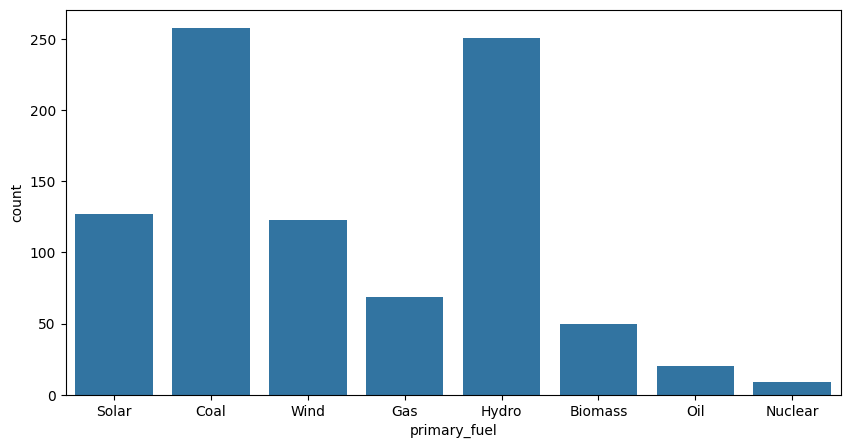

In [43]:
# visualizing the types of fuel in primary_fuel
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x='primary_fuel',data=df)
plt.show()

other_fuel1
Oil             904
Gas               2
Cogeneration      1
Name: count, dtype: int64


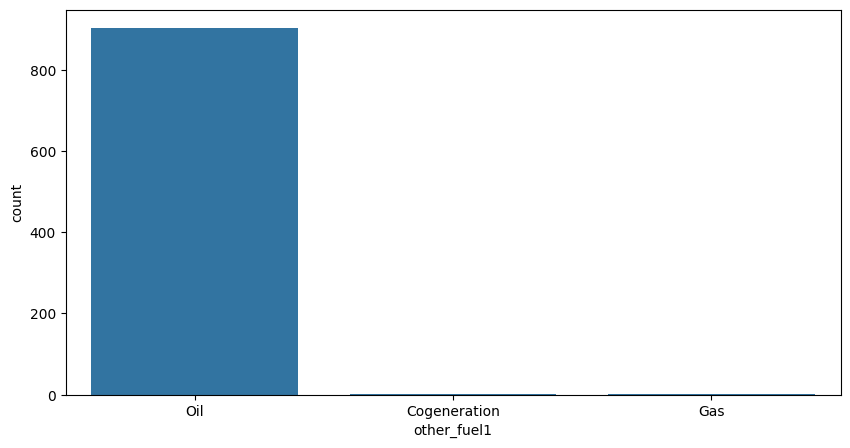

In [44]:
# visualizing the counts of other fuel
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x='other_fuel1',data=df)
plt.show()

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


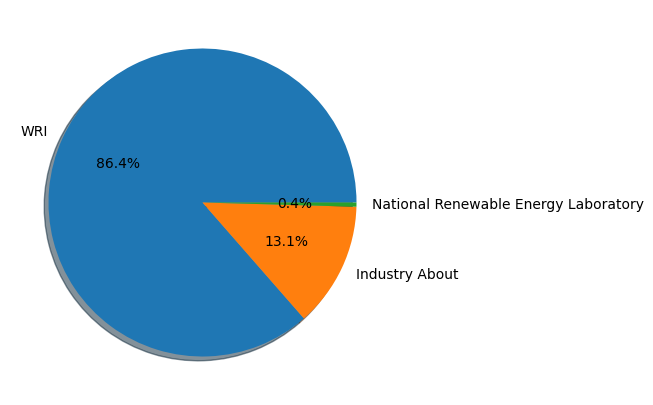

In [45]:
# visualizing the counts of owner
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,5))
plt.pie(df['geolocation_source'].value_counts(),labels=labels,autopct='%1.1f%%', shadow=True)
plt.show()

DISTRIBUTION OF SKEWNESS


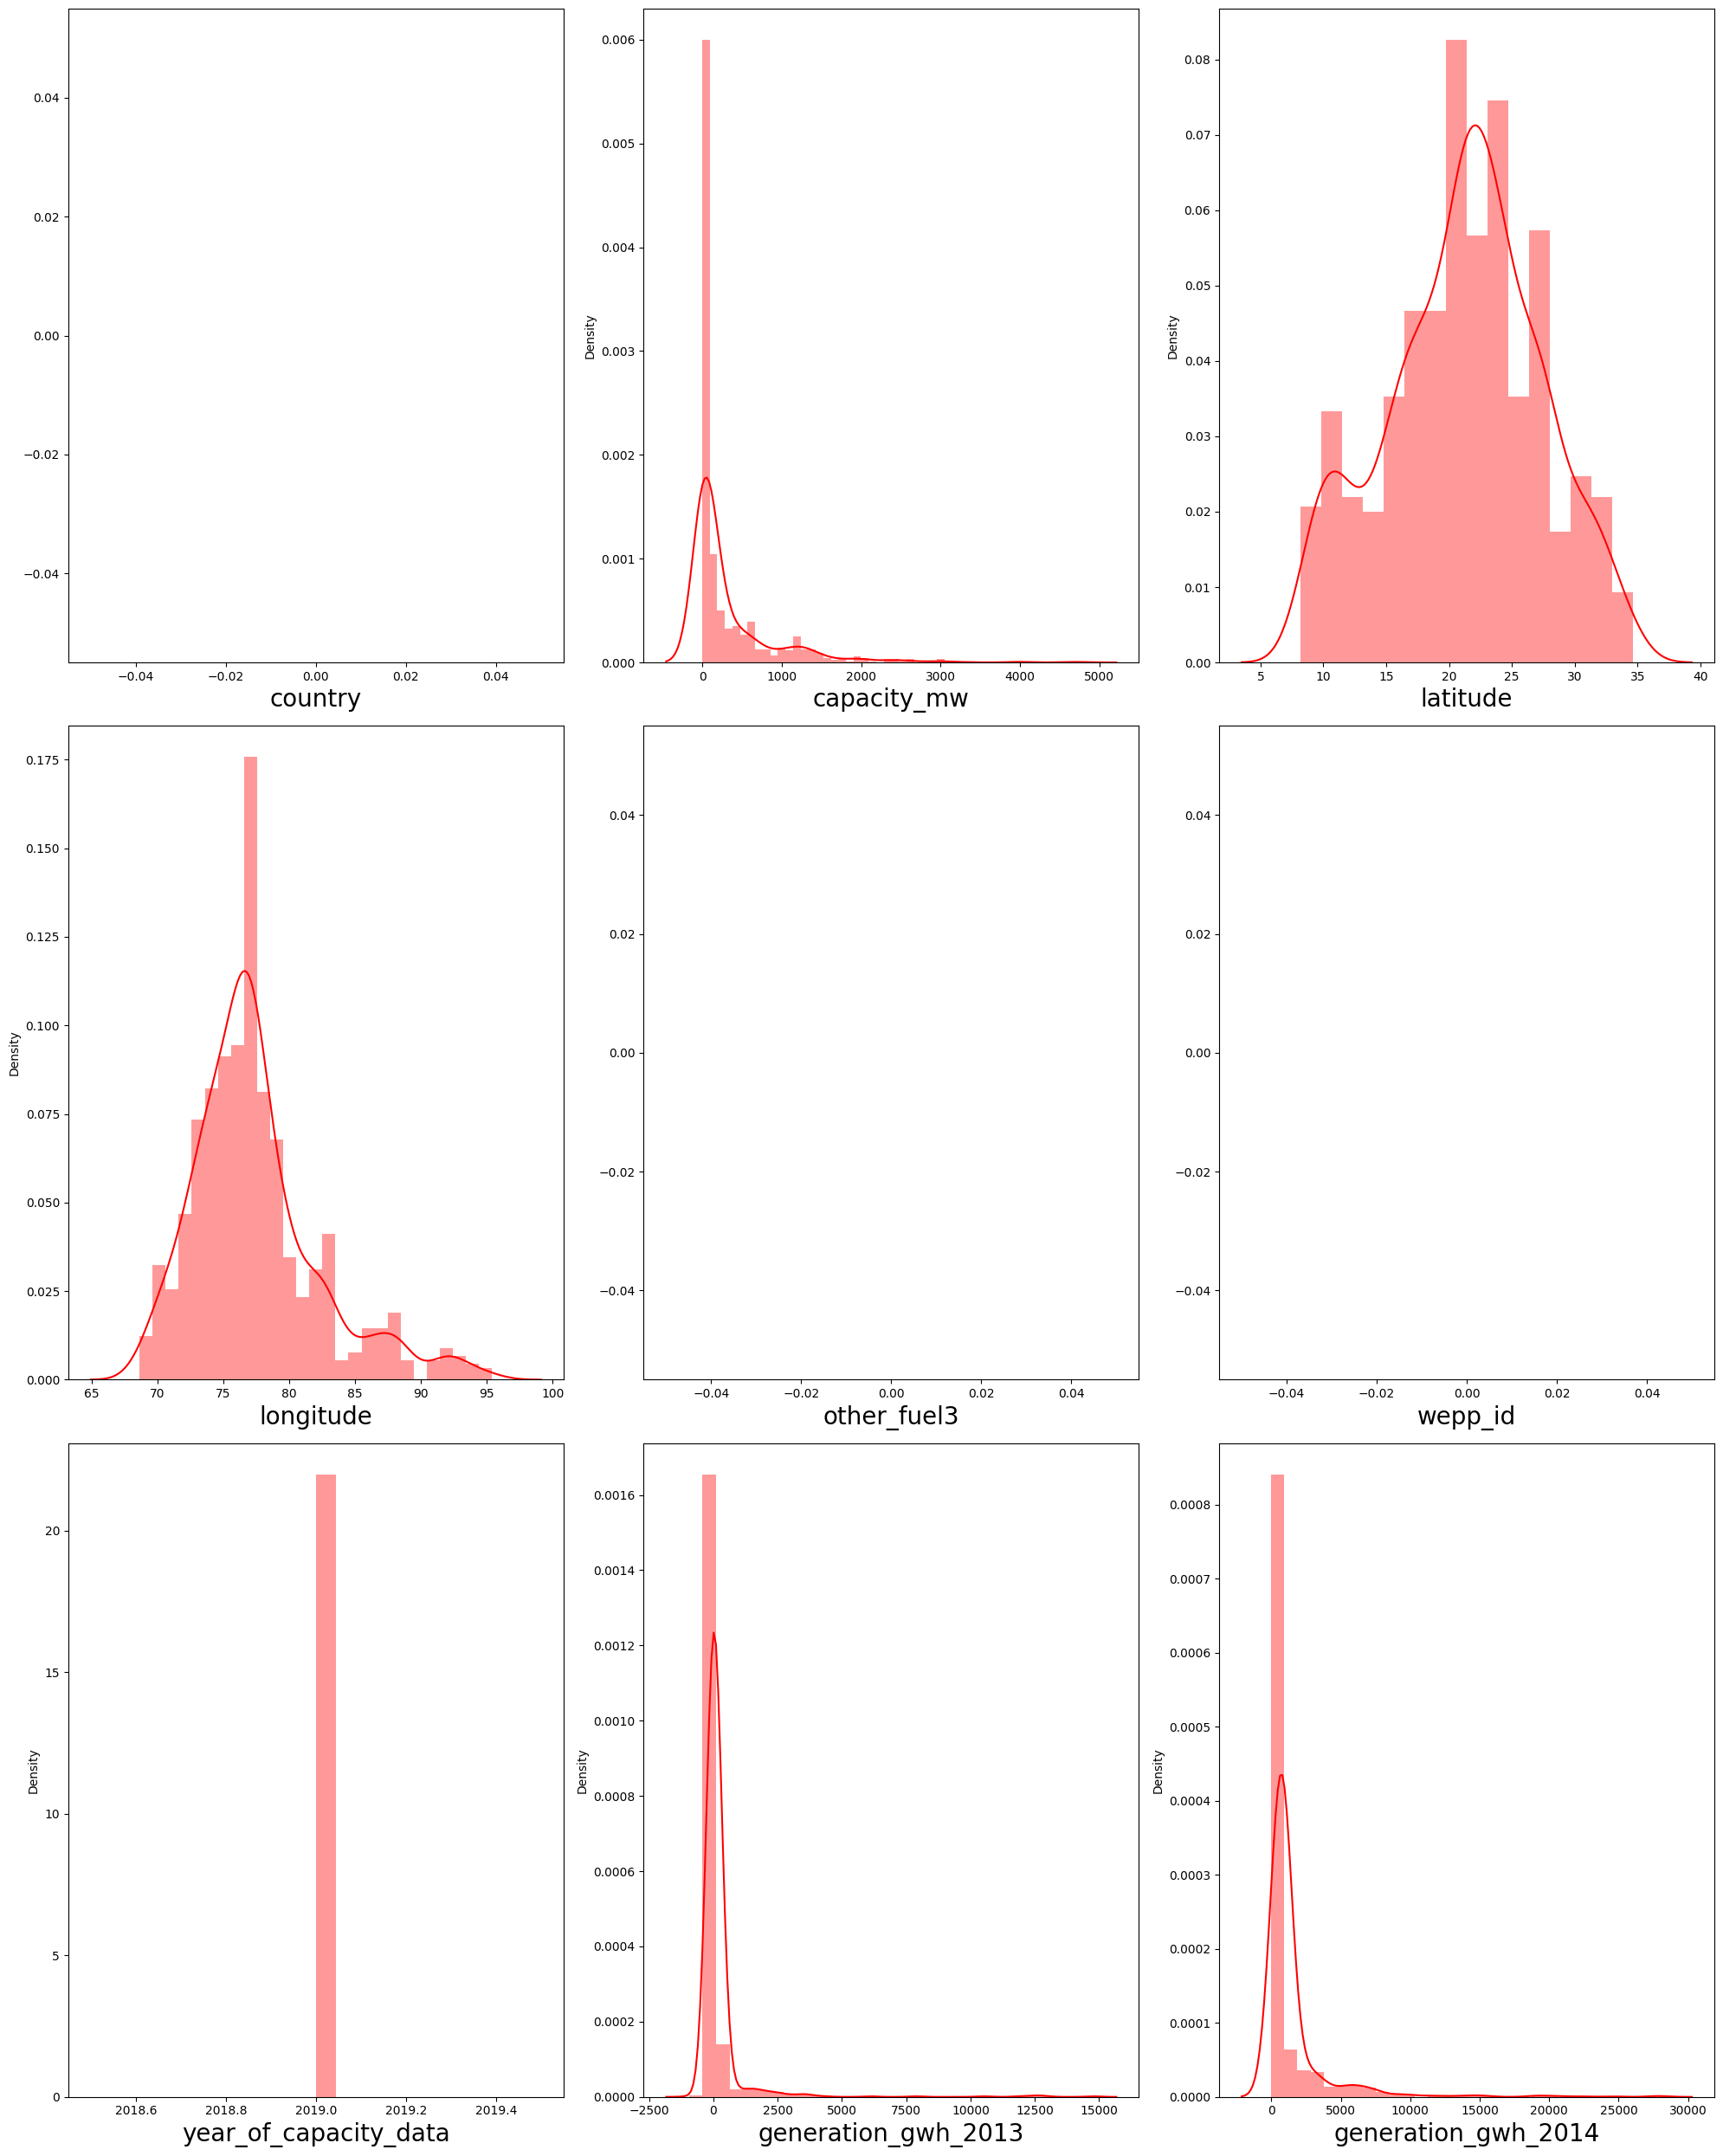

In [46]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
   if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(df[column],color='r')
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

COMPARING TARGET VARIABLE CAPACITY_MW WITH FEATURES

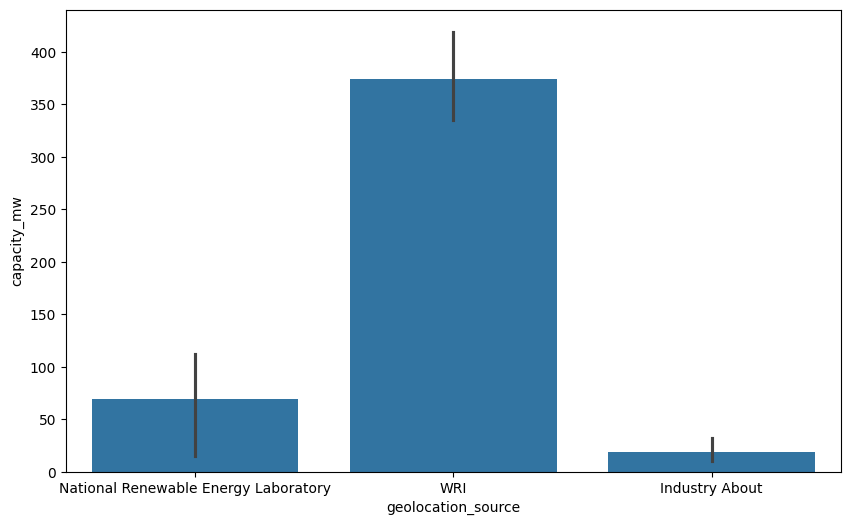

In [47]:
# let's check the relation between source and capacity_mw
plt.figure(figsize=(10,6))
sns.barplot(x='geolocation_source',y='capacity_mw',data=df)
plt.show()

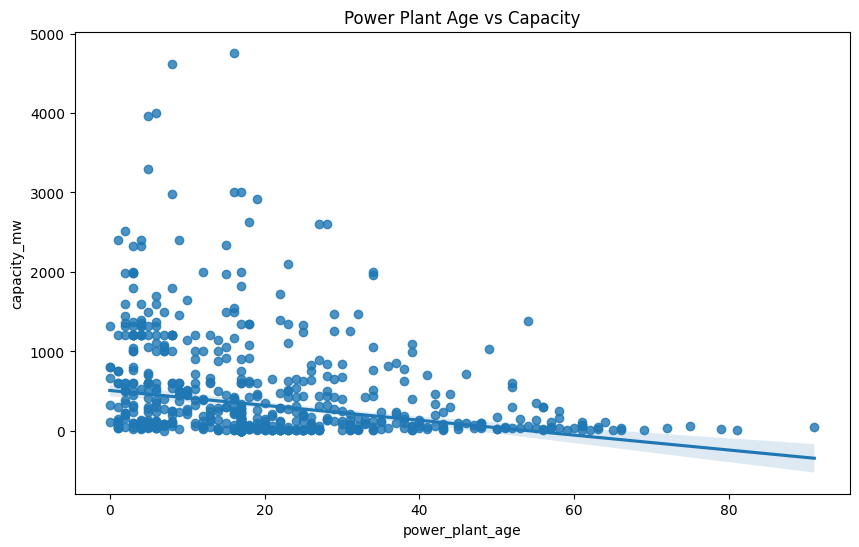

In [48]:
# let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=(10,6))
sns.regplot(x='power_plant_age',y='capacity_mw',data=df)
plt.title('Power Plant Age vs Capacity')
plt.show()

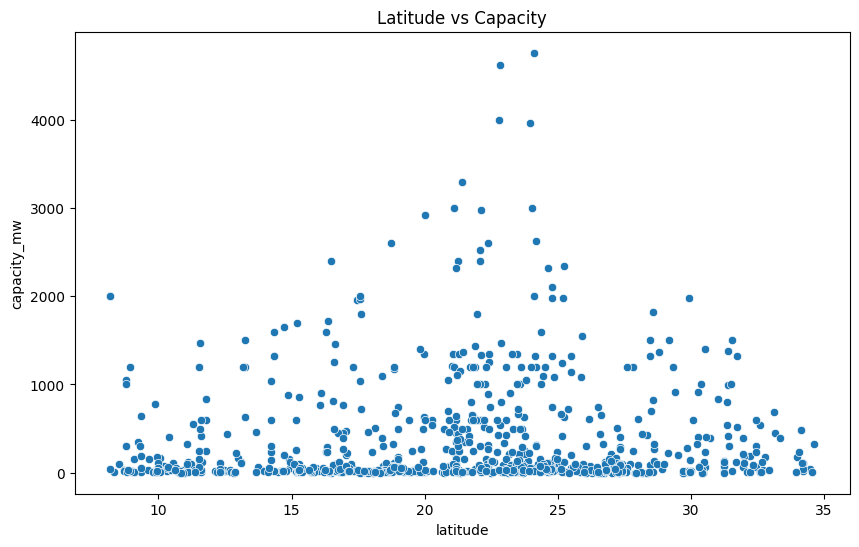

In [49]:
# let's check how the capacity is related to latitude of the power plant
plt.figure(figsize=(10,6))
plt.style.use('default')
sns.scatterplot(x='latitude',y='capacity_mw',data=df)
plt.title('Latitude vs Capacity')
plt.show()

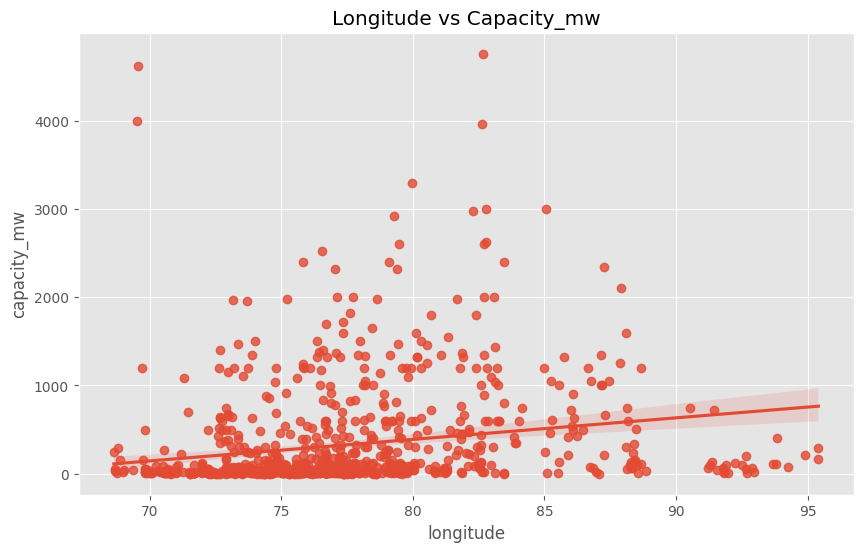

In [50]:
#let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.regplot(x='longitude',y='capacity_mw',data=df)
plt.title('Longitude vs Capacity_mw')
plt.show()

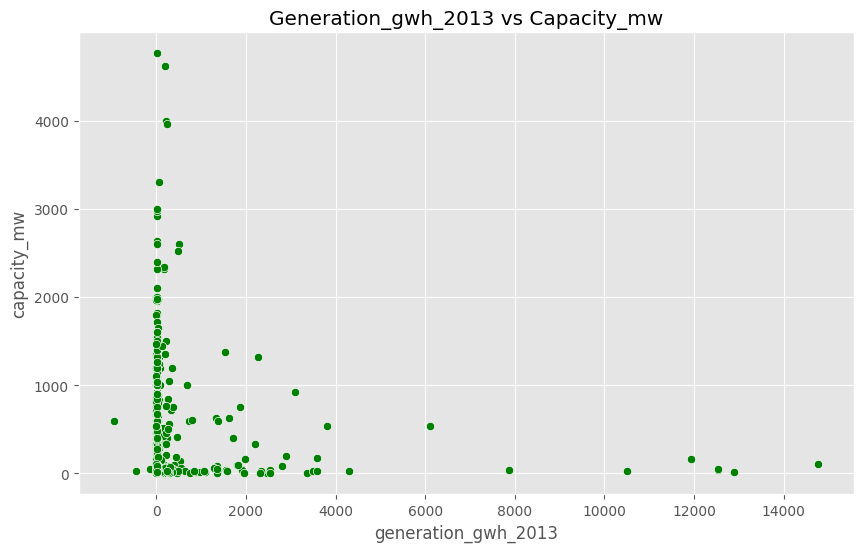

In [51]:
# let's check the capacity of the plant in generation_gwh_2013
plt.figure(figsize=(10,6))
sns.scatterplot(x='generation_gwh_2013',y='capacity_mw',data=df,color='g')
plt.title('Generation_gwh_2013 vs Capacity_mw')
plt.show()

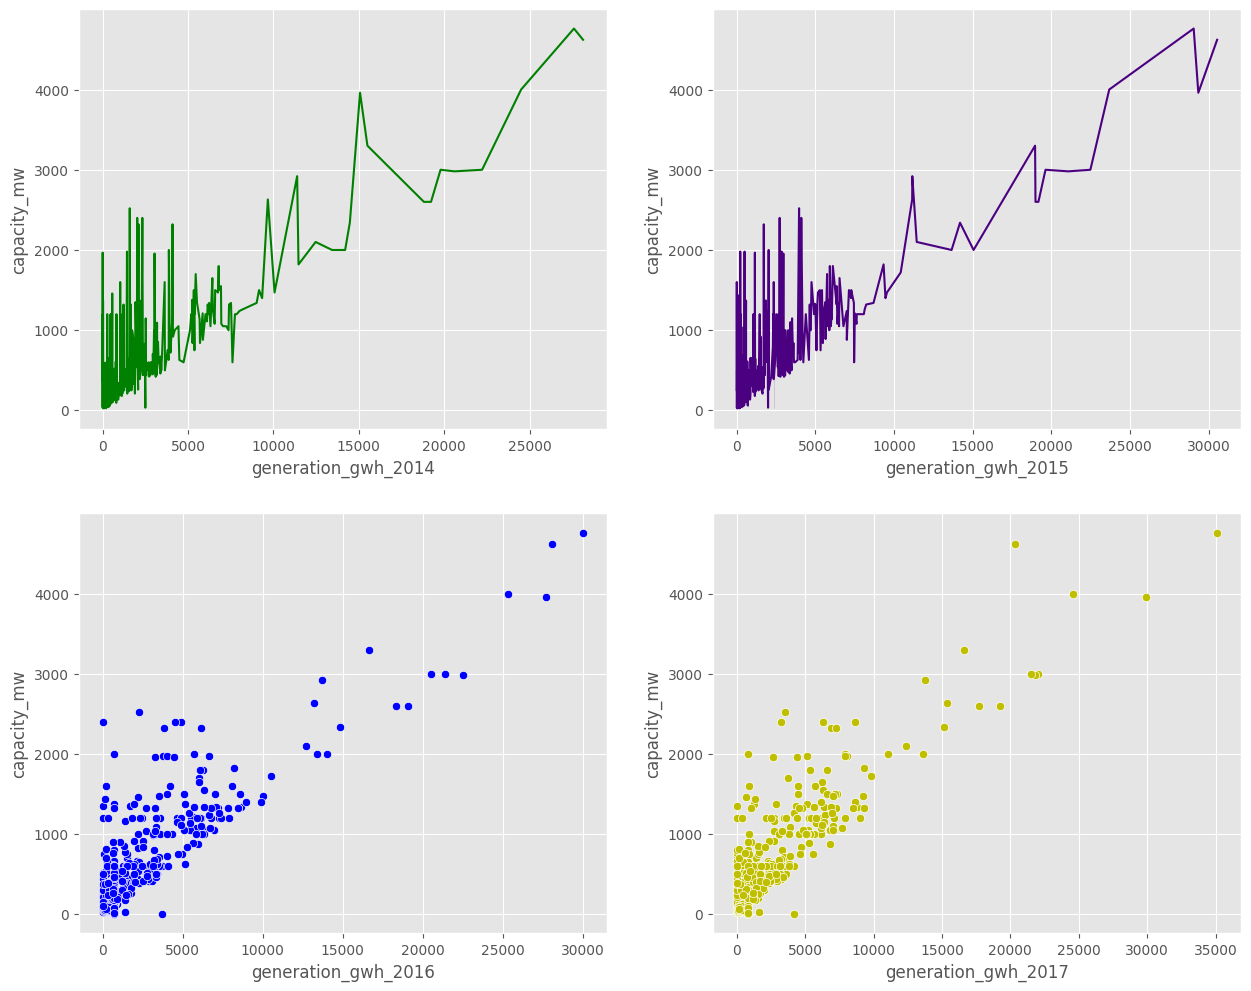

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
#checking attrition level in dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],color='g', data=df) # Added data=df

#checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

#checking attrition level in monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='b')

#checking attrition level in monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='y')

plt.show()

COMPARING THE TARGET VARIABLE FUEL TYPES WITH OTHER FEATURES

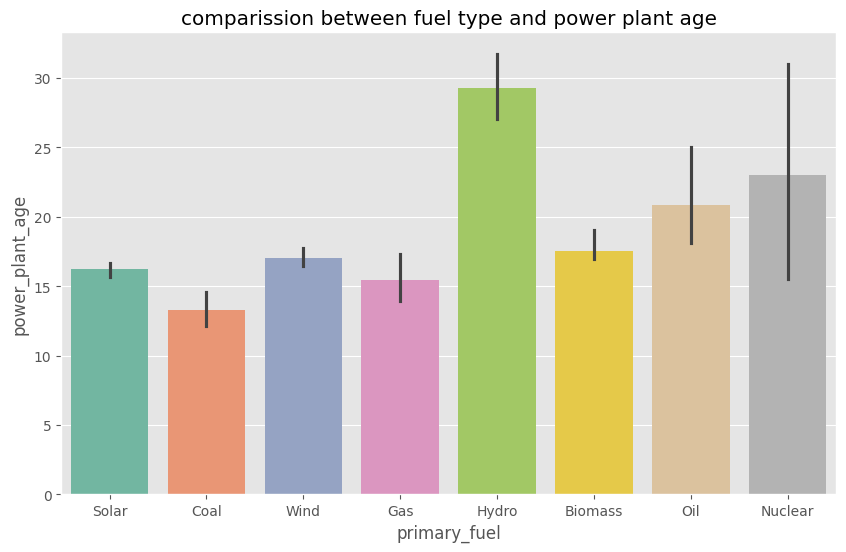

In [53]:
# Let's check how the power plant age affects fuel type
plt.figure(figsize=(10,6))
sns.barplot(x='primary_fuel',y='power_plant_age',data=df,palette='Set2')
plt.title('comparission between fuel type and power plant age')
plt.show()

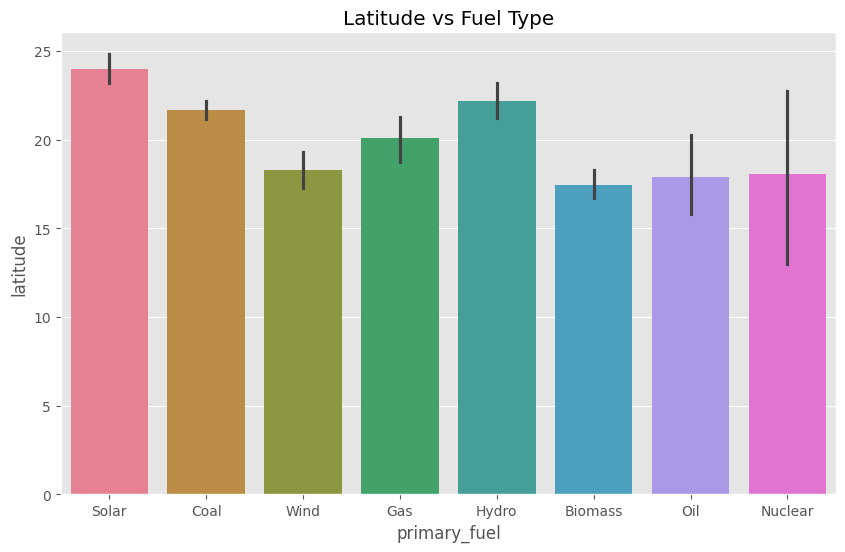

In [54]:
# let's check how the fuel type is related to latitude of the power plant
plt.figure(figsize=(10,6))
sns.barplot(y='latitude',x='primary_fuel',data=df,palette="husl");
plt.title('Latitude vs Fuel Type')
plt.show()

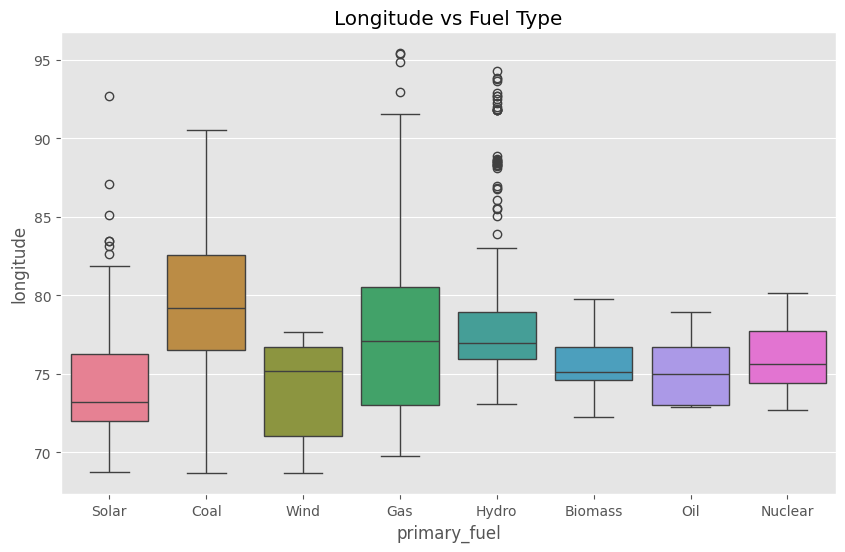

In [55]:
#let's check how the fuel is related to longitude of the power plant
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.boxplot(y='longitude',x='primary_fuel',data=df,palette="husl");
plt.title('Longitude vs Fuel Type')
plt.show()

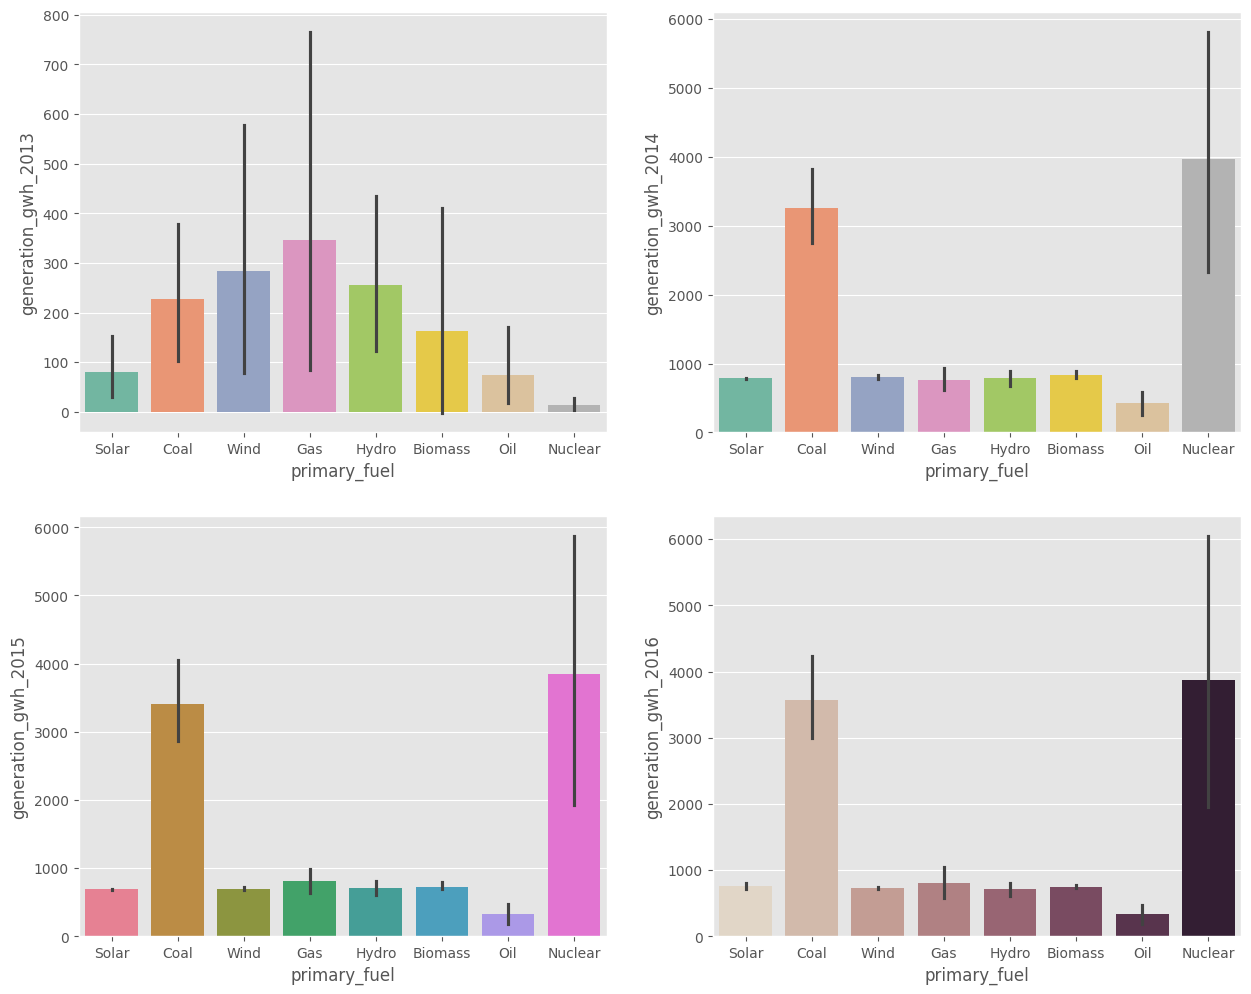

In [56]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in dailyrate
sns.barplot(x='primary_fuel', y='generation_gwh_2013',ax=axes[0,0],data=df,palette = 'Set2')

#checking attrition level in hourlyrate
sns.barplot(x='primary_fuel', y='generation_gwh_2014',ax=axes[0,1],data=df,palette = 'Set2')

#checking attrition level in monthlyrate
sns.barplot(x='primary_fuel', y='generation_gwh_2015',ax=axes[1,0],data=df,palette = 'husl')

#checking attrition level in monthlyincome
sns.barplot(x='primary_fuel', y='generation_gwh_2016',ax=axes[1,1],data=df,palette = 'ch:.25')

plt.show()

CHECKING THE RELATION BETWEEN TARGETS

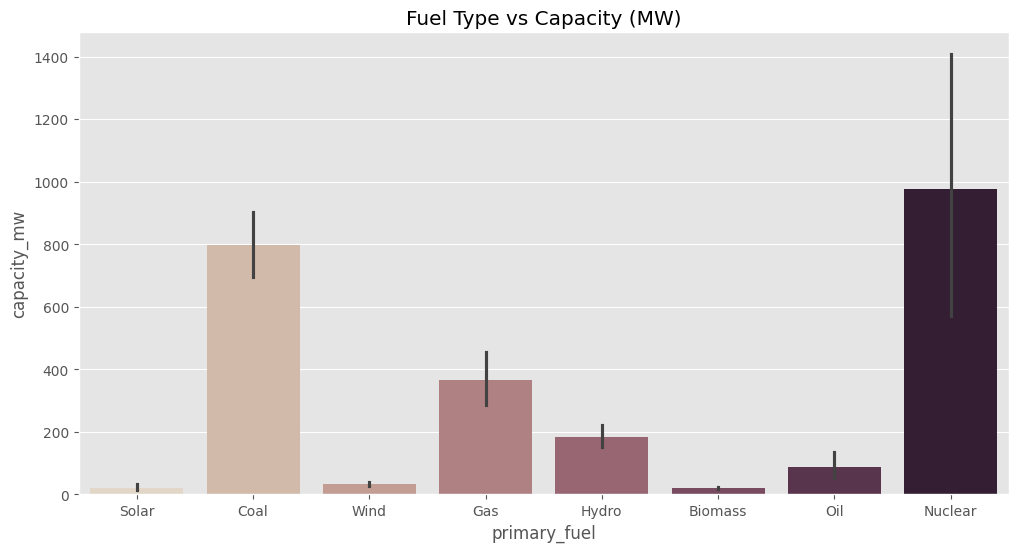

In [57]:
# Let's check the relation between fuel type and capacity_mw
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_fuel', y='capacity_mw', data=df,palette='ch:.25')
plt.title('Fuel Type vs Capacity (MW)')
plt.show()

MULTIVARIATE ANALYSIS

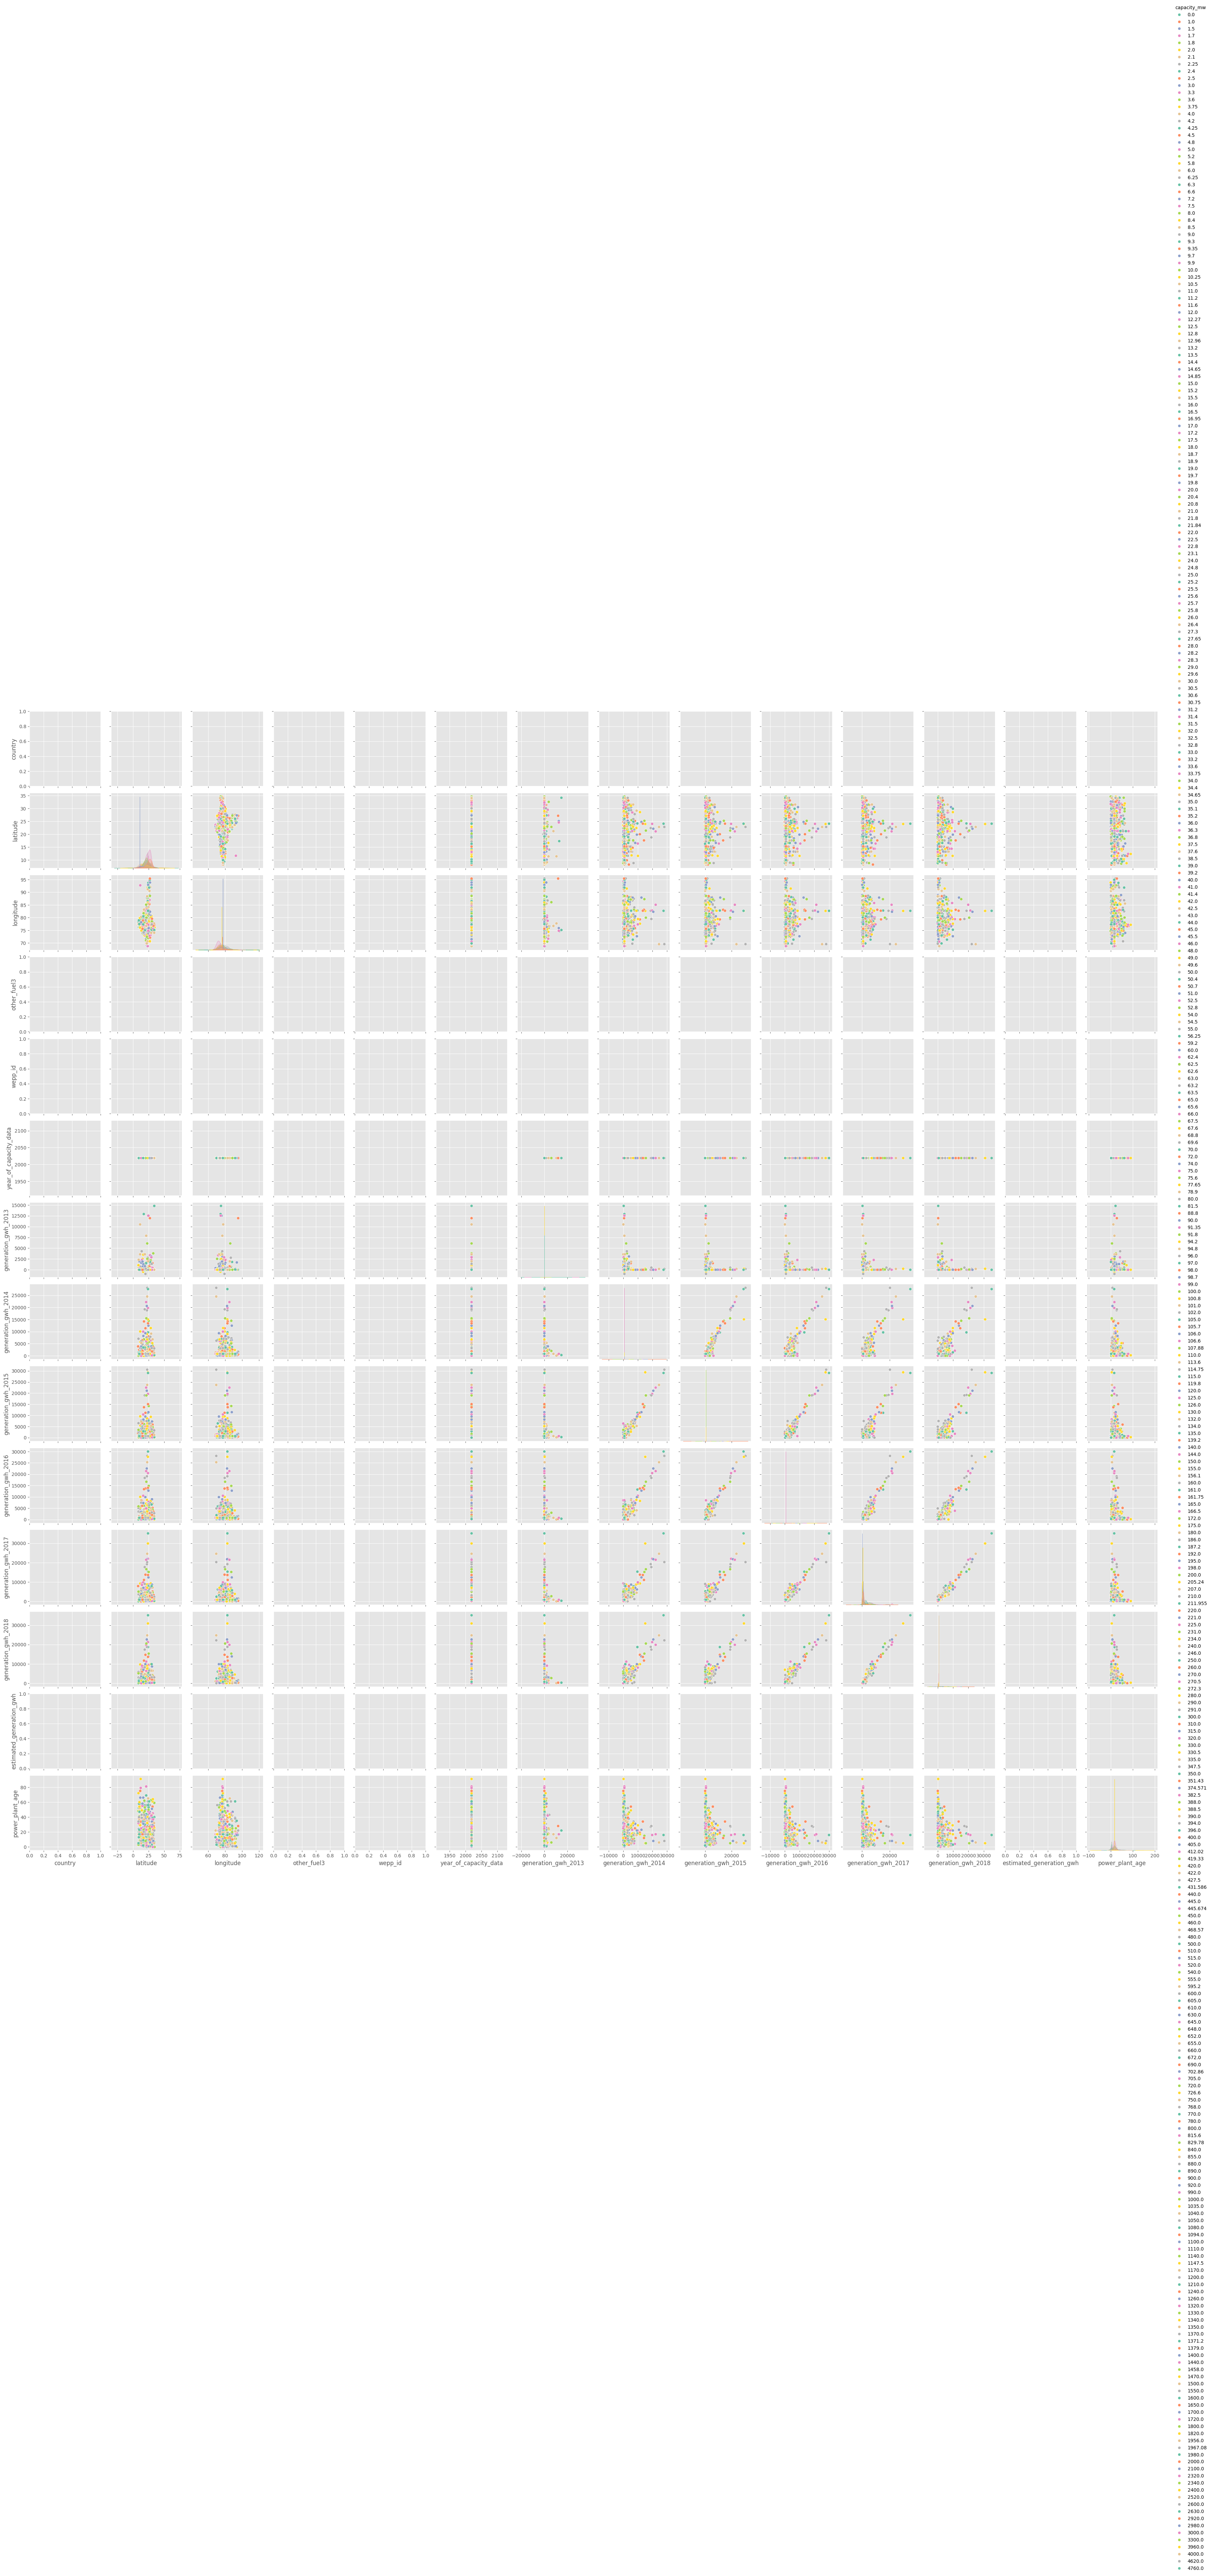

In [58]:
# Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df,hue='capacity_mw',palette='Set2')

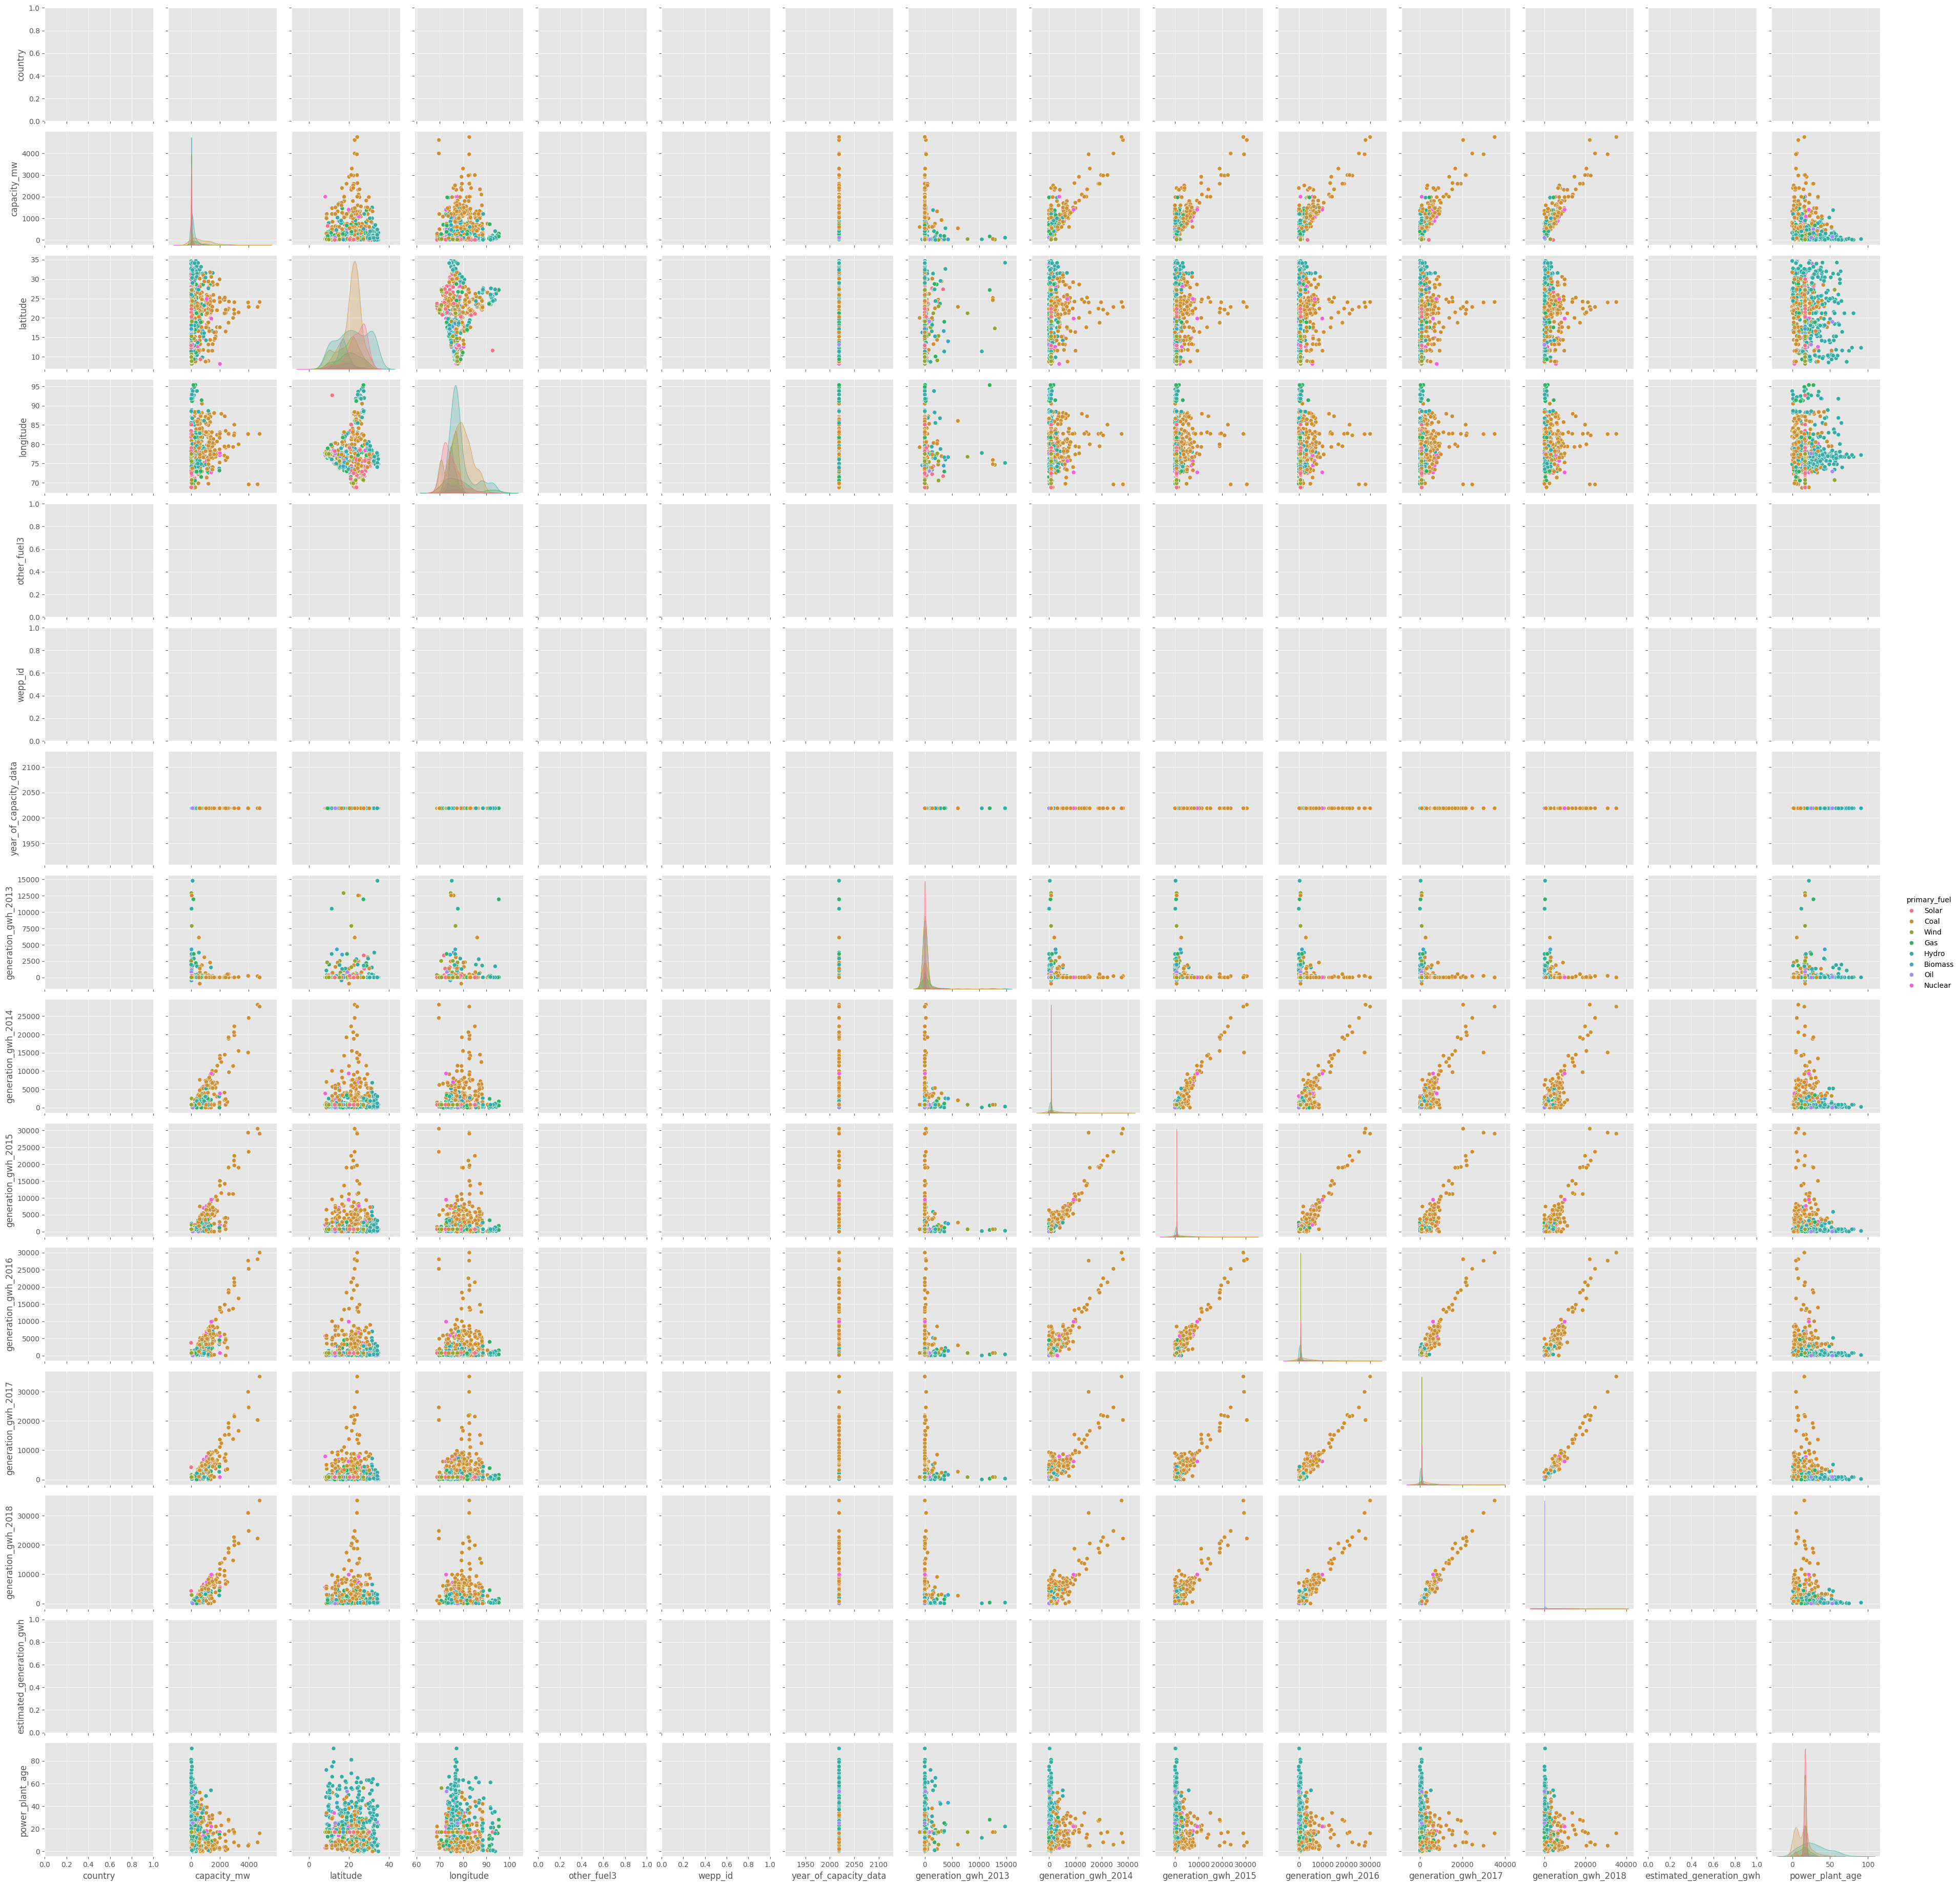

In [59]:
# checking the pairwise relation between the features and lavel fuel_type.
sns.pairplot(df,hue='primary_fuel',palette='husl')

OUTLIERS HANDLING

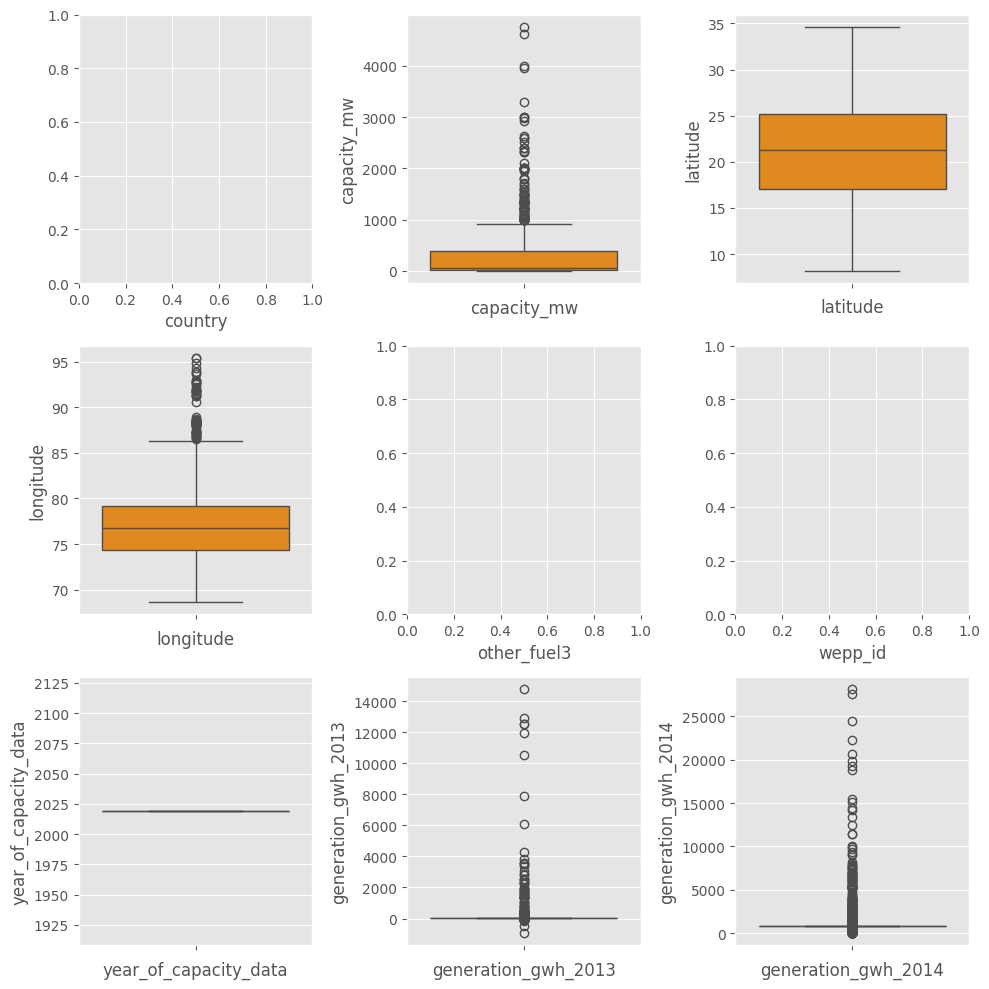

In [60]:
# identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
# Exclude non-numerical columns
numerical_col = df.select_dtypes(include=['float', 'int']).columns
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        # Ensure the data for the boxplot is numerical
        sns.boxplot(df[column].dropna(), color='darkorange') # Drop any missing values
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

REMOVING OUTLIERS

ZSCORE METHOD

In [61]:
# Features containg outliers
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

In [62]:
# using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0     0.869917             0.258370             0.270135             0.276533   
1     0.585590             0.258370             0.270135             0.276533   
2     1.673567             0.258370             0.270135             0.276533   
3     2.895239             0.321829             0.221140             0.227009   
4     1.035238             0.545994             1.477708             1.555902   
..         ...                  ...                  ...                  ...   
902   0.014609             0.258370             0.503382             0.444143   
903   0.153415             0.258370             0.270135             0.276533   
904   0.383592             0.258370             0.270135             0.276533   
905   0.764564             0.258370             0.270135             0.276533   
906   0.010327             0.258370             0.270135             0.276533   

     generation_gwh_2017  
0               0.276524  
1               0.276524  
2               0.276524  
3               0.327136  
4               1.222655  
..                   ...  
902             0.260959  
903             0.276524  
904             0.276524  
905             0.276524  
906             0.276524  

[907 rows x 5 columns]

In [63]:
# creating new dataframe

new_df=df[(z<3).all(axis=1)]
new_df

country country_long  capacity_mw  latitude  longitude primary_fuel  \
0        NaN        India          2.5   28.1839    73.2407        Solar   
1        NaN        India         98.0   24.7663    74.6090         Coal   
2        NaN        India         39.2   21.9038    69.3732         Wind   
3        NaN        India        135.0   23.8712    91.3602          Gas   
4        NaN        India       1800.0   21.9603    82.4091         Coal   
..       ...          ...          ...       ...        ...          ...   
902      NaN        India       1600.0   16.2949    77.3568         Coal   
903      NaN        India          3.0   12.8932    78.1654        Solar   
904      NaN        India         25.5   15.2758    75.5811         Wind   
905      NaN        India         80.0   24.3500    73.7477         Coal   
906      NaN        India         16.5    9.9344    77.4768         Wind   

    other_fuel1 other_fuel2  other_fuel3  \
0           Oil         NaN          NaN   
1           Oil         NaN          NaN   
2           Oil         NaN          NaN   
3           Oil         NaN          NaN   
4           Oil         NaN          NaN   
..          ...         ...          ...   
902         Oil         NaN          NaN   
903         Oil         NaN          NaN   
904         Oil         NaN          NaN   
905         Oil         NaN          NaN   
906         Oil         NaN          NaN   

                                   source  ... generation_gwh_2013  \
0    National Renewable Energy Laboratory  ...            14.26400   
1                    Ultratech Cement ltd  ...            14.26400   
2                                     CDM  ...            14.26400   
3           Central Electricity Authority  ...             2.41461   
4           Central Electricity Authority  ...            14.26400   
..                                    ...  ...                 ...   
902         Central Electricity Authority  ...            14.26400   
903   Karnataka Power Corporation Limited  ...             1.92500   
904                                   CDM  ...             2.05400   
905                    Hindustan Zinc ltd  ...            14.26400   
906                                   CDM  ...            14.26400   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             794.587100           697.450781           737.205450   
1             794.587100           697.450781           737.205450   
2             794.587100           697.450781           737.205450   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902           794.587100             0.994875           233.596650   
903           794.587100           697.450781           737.205450   
904           794.587100           697.450781           737.205450   
905           794.587100           697.450781           737.205450   
906           794.587100           697.450781           737.205450   

     generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0             817.977250                  NaN                  NaN   
1             817.977250                  NaN                  NaN   
2             817.977250                  NaN                  NaN   
3             663.774500           626.239128                  NaN   
4            5385.579736          7279.000000                  NaN   
..                   ...                  ...                  ...   
902           865.400000           686.500000                  NaN   
903           817.977250                  NaN                  NaN   
904           817.977250                  NaN                  NaN   
905           817.977250                  NaN                  NaN   
906           817.977250                  NaN                  NaN   

            generation_data_source  esti

In [64]:
df.shape

(907, 23)

In [65]:
new_df.shape

(872, 23)

In [66]:
# checking the data loss
data_loss = (907-872)/907*100
data_loss

3.8588754134509373

IQR METHOD (INTER QUANTILE RANGE)

In [67]:
# Convert relevant columns to numeric type
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN
        except:
            pass  # Skip columns that cannot be converted

Q1 = df.quantile(0.25)  # Calculate quantiles on the entire DataFrame
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [68]:
df1.shape

(227, 23)

In [69]:
# let's check the dataloss
data_loss = (907-227)/907*100
data_loss

74.97243660418964

ENCODING THE CATEGORICAL COLUMNS USING LABEL ENCODING

In [70]:
categorical_col = ['primary_fuel','other_fuel1','geolocation_source']

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(le.fit_transform)

In [72]:
new_df[categorical_col]

primary_fuel  other_fuel1  geolocation_source
0               6            2                   1
1               1            2                   2
2               7            2                   2
3               2            2                   2
4               1            2                   2
..            ...          ...                 ...
902             1            2                   2
903             6            2                   0
904             7            2                   2
905             1            2                   2
906             7            2                   2

[872 rows x 3 columns]

CORRELATION BETWEEN THE TARGET VARIABLE AND FEATURES USING HEATMAP

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(le.fit_transform)

# Convert the encoded columns to numeric type
new_df[categorical_col] = new_df[categorical_col].astype(int)

# Explicitly select only numerical columns for correlation calculation
numerical_df = new_df.select_dtypes(include=['number'])  # Select numerical columns
cor = numerical_df.corr()
cor

country  capacity_mw  latitude  longitude  \
country                       NaN          NaN       NaN        NaN   
capacity_mw                   NaN     1.000000  0.049141   0.248009   
latitude                      NaN     0.049141  1.000000  -0.008524   
longitude                     NaN     0.248009 -0.008524   1.000000   
primary_fuel                  NaN    -0.395456 -0.002561  -0.379072   
other_fuel1                   NaN    -0.002118  0.036313   0.029347   
other_fuel3                   NaN          NaN       NaN        NaN   
geolocation_source            NaN     0.227716 -0.198647   0.263635   
wepp_id                       NaN          NaN       NaN        NaN   
year_of_capacity_data         NaN          NaN       NaN        NaN   
generation_gwh_2013           NaN    -0.038335  0.024631  -0.005650   
generation_gwh_2014           NaN     0.616798  0.077899   0.114926   
generation_gwh_2015           NaN     0.676394  0.068434   0.149958   
generation_gwh_2016           NaN     0.747035  0.058341   0.186977   
generation_gwh_2017           NaN     0.790146  0.071708   0.187690   
generation_gwh_2018           NaN     0.821821  0.054457   0.084436   
estimated_generation_gwh      NaN          NaN       NaN        NaN   
power_plant_age               NaN    -0.246619 -0.084571  -0.038239   

                          primary_fuel  other_fuel1  other_fuel3  \
country                            NaN          NaN          NaN   
capacity_mw                  -0.395456    -0.002118          NaN   
latitude                     -0.002561     0.036313          NaN   
longitude                    -0.379072     0.029347          NaN   
primary_fuel                  1.000000     0.006247          NaN   
other_fuel1                   0.006247     1.000000          NaN   
other_fuel3                        NaN          NaN          NaN   
geolocation_source           -0.478839    -0.022232          NaN   
wepp_id                            NaN          NaN          NaN   
year_of_capacity_data              NaN          NaN          NaN   
generation_gwh_2013          -0.011960     0.008907          NaN   
generation_gwh_2014          -0.251195    -0.001195          NaN   
generation_gwh_2015          -0.278191     0.005252          NaN   
generation_gwh_2016          -0.284422     0.014966          NaN   
generation_gwh_2017          -0.287183     0.011408          NaN   
generation_gwh_2018          -0.433253     0.043855          NaN   
estimated_generation_gwh           NaN          NaN          NaN   
power_plant_age               0.050249    -0.043061          NaN   

                          geolocation_source  wepp_id  year_of_capacity_data  \
country                                  NaN      NaN                    NaN   
capacity_mw                         0.227716      NaN                    NaN   
latitude                           -0.198647      NaN                    NaN   
longitude                           0.263635      NaN                    NaN   
primary_fuel                       -0.478839      NaN                    NaN   
other_fuel1                        -0.022232      NaN                    NaN   
other_fuel3                              NaN      NaN                    NaN   
geolocation_source                  1.000000      NaN                    NaN   
wepp_id                                  NaN      NaN                    NaN   
year_of_capacity_data                    NaN      NaN                    NaN   
generation_gwh_2013                 0.047421      NaN                    NaN   
generation_gwh_2014                 0.110856      NaN                    NaN   
generation_gwh_2015                 0.123379      NaN                    NaN   
generation_gwh_2016                 0.116879      NaN                    NaN   
generation_gwh_2017                 0.114637      NaN                    NaN   
generation_gwh_2018                -0.046537      NaN                    NaN   
estimated_generation_gw

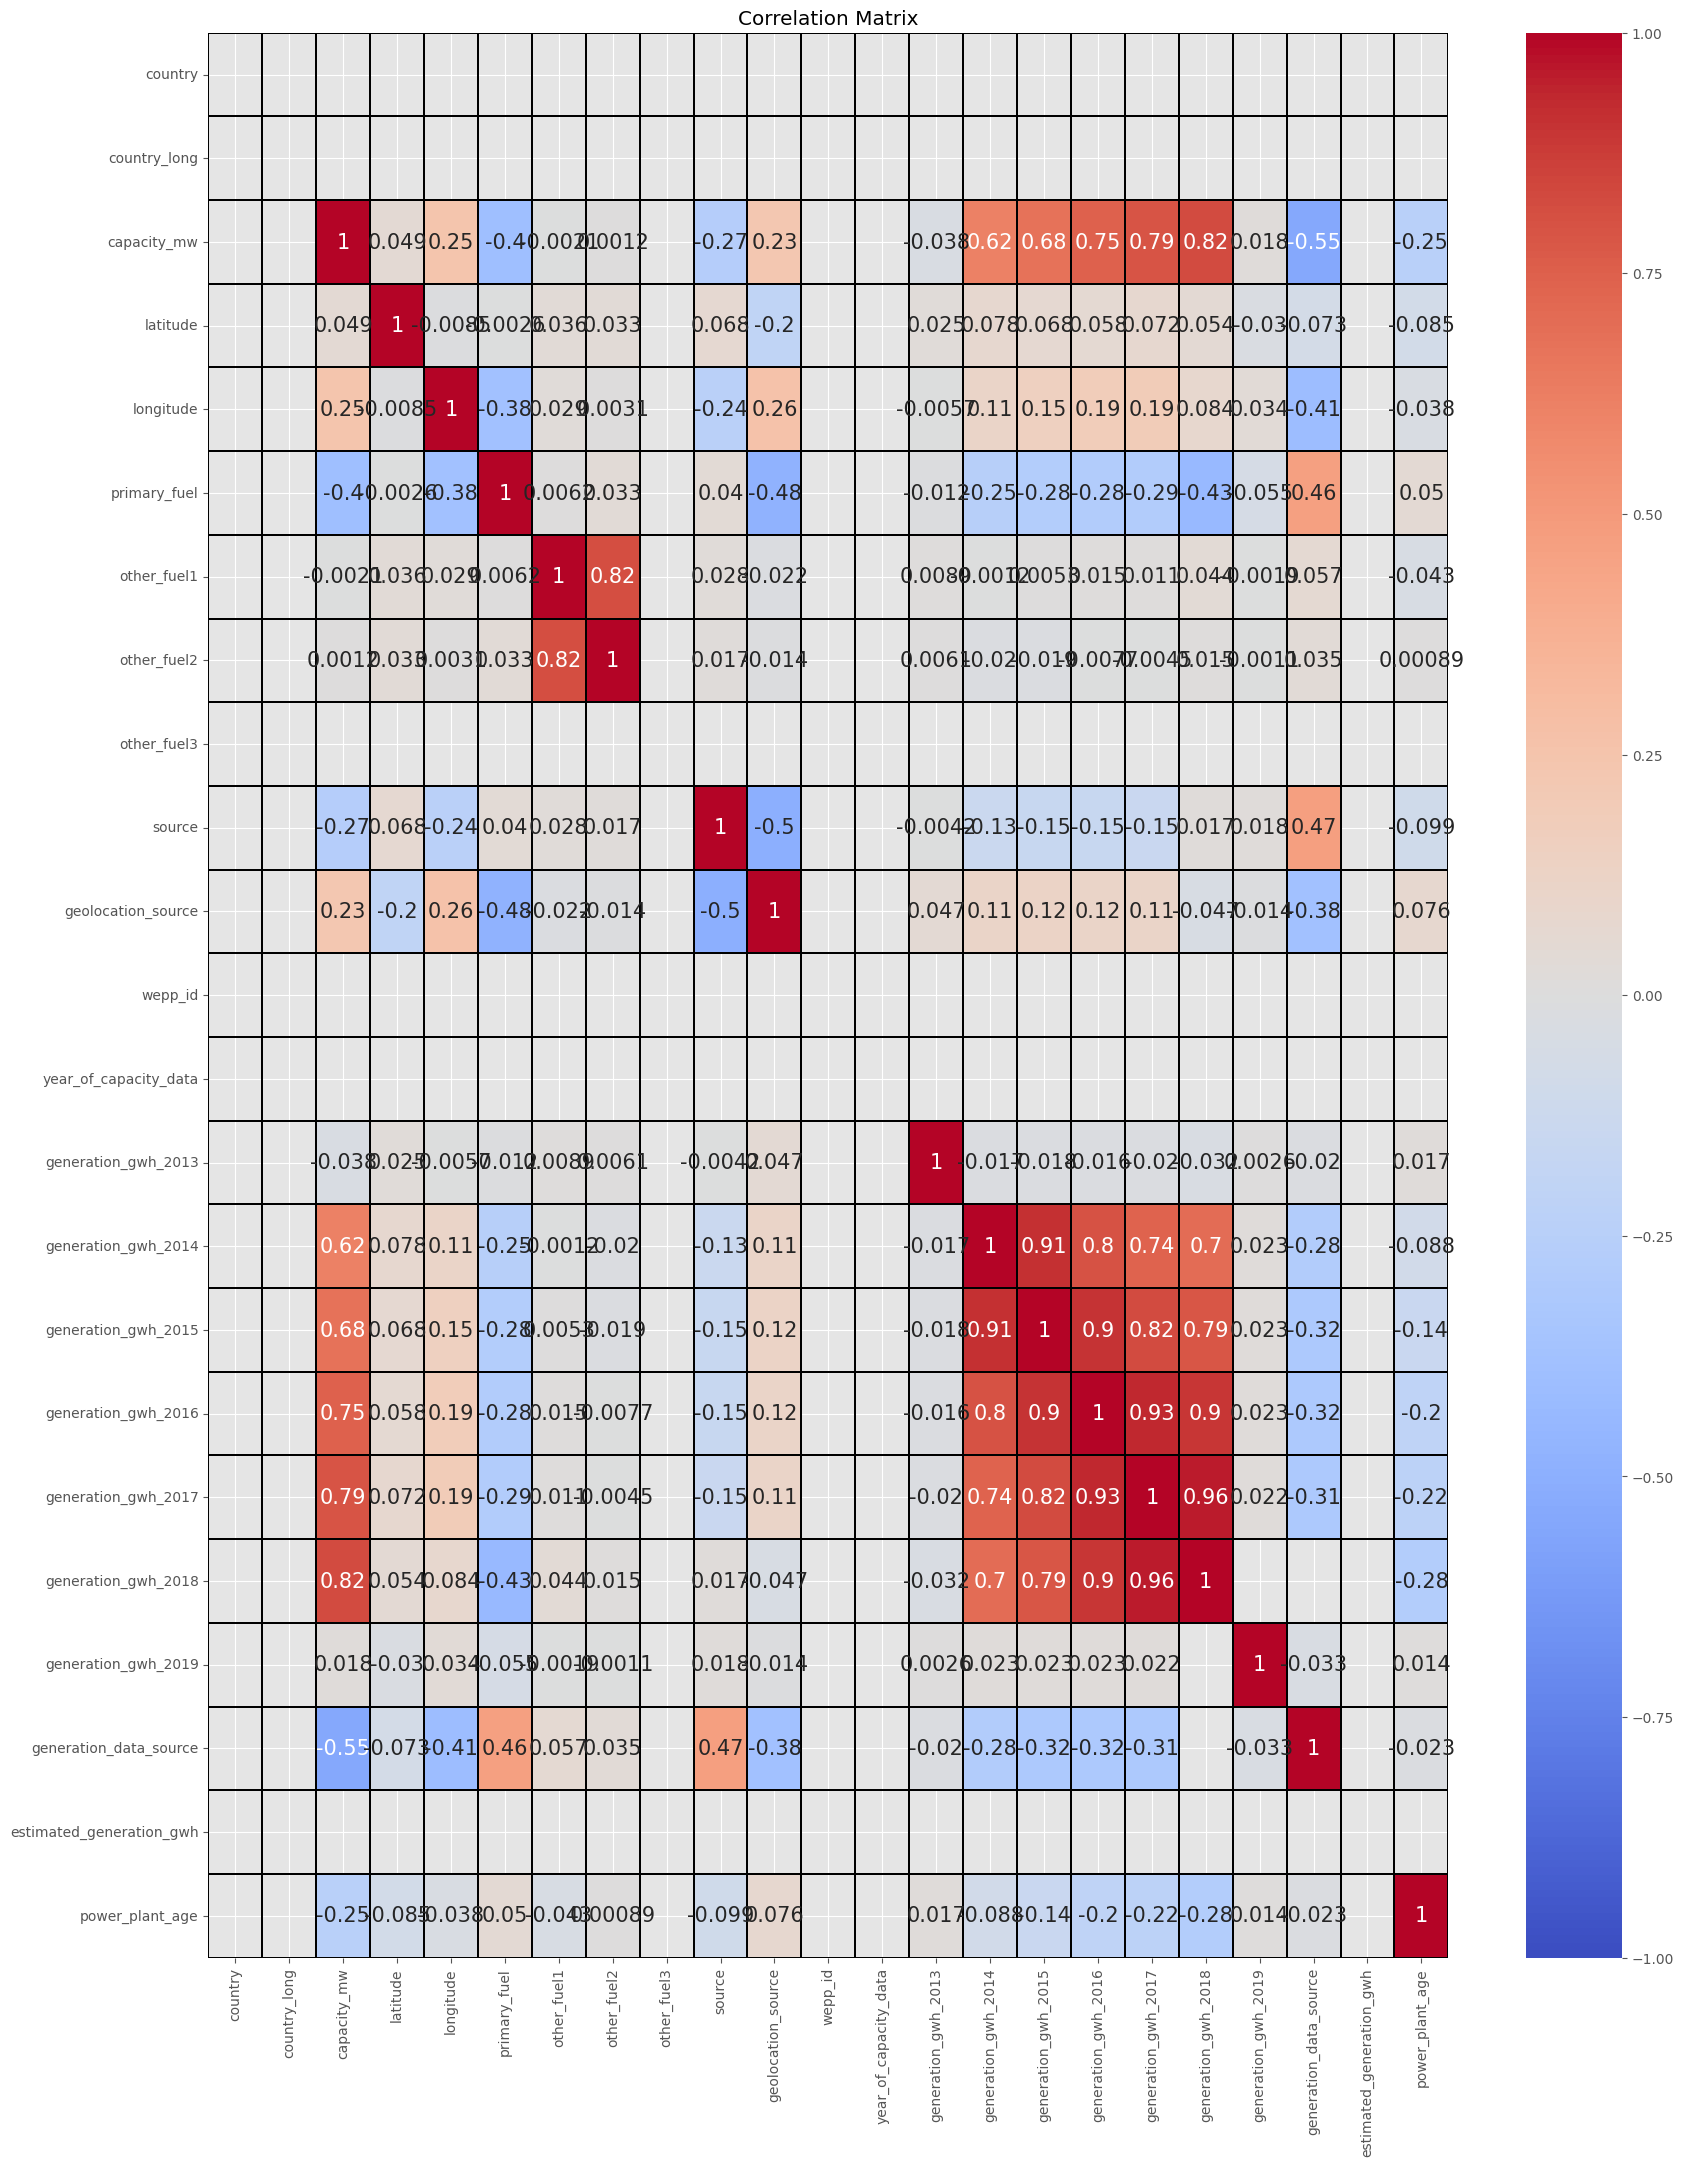

In [74]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

le = LabelEncoder()

# Apply LabelEncoder to each categorical column individually
for col in new_df.select_dtypes(include=['object']):
    new_df[col] = le.fit_transform(new_df[col])

# Convert all columns to numeric type to ensure compatibility
new_df = new_df.apply(pd.to_numeric, errors='coerce')

# Calculate correlation on the entirely numeric DataFrame
cor = new_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20,25))
sns.heatmap(cor, linewidths=.1, vmin=-1, fmt='.2g', annot=True,
            linecolor='black', annot_kws={'size':15}, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.yticks(rotation=0)
plt.show()

VISUALISING THE CORRELATION BETWEEN LABEL FEATURES USING BARPLOT

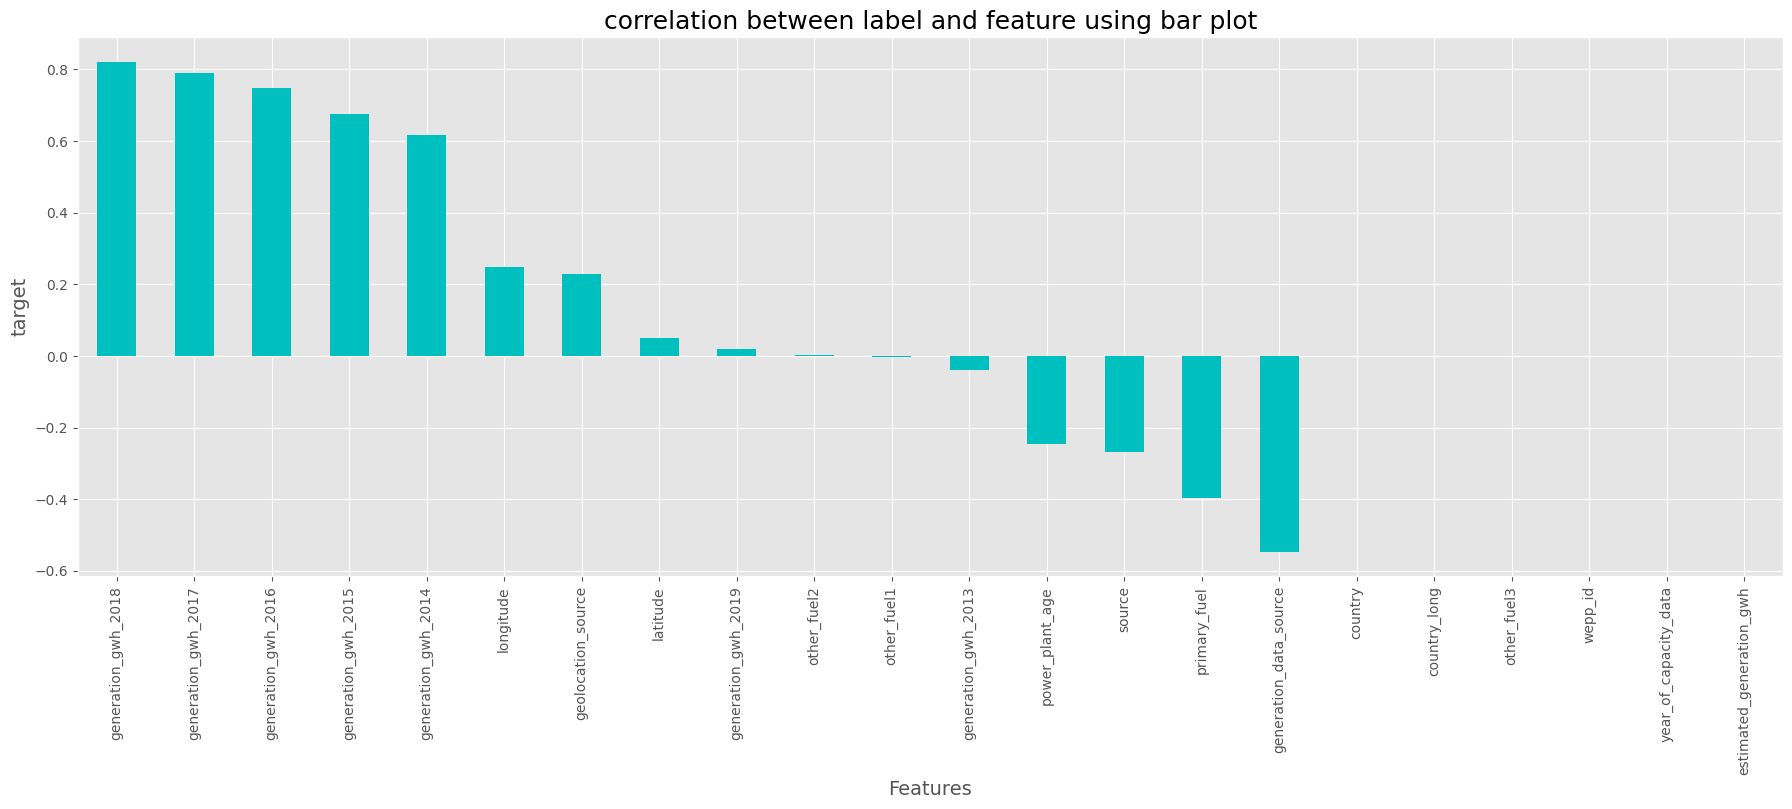

In [75]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

VISUALIZING THE CORRELATION BETWEEN LABEL AND FEATURES USING BARPLOT

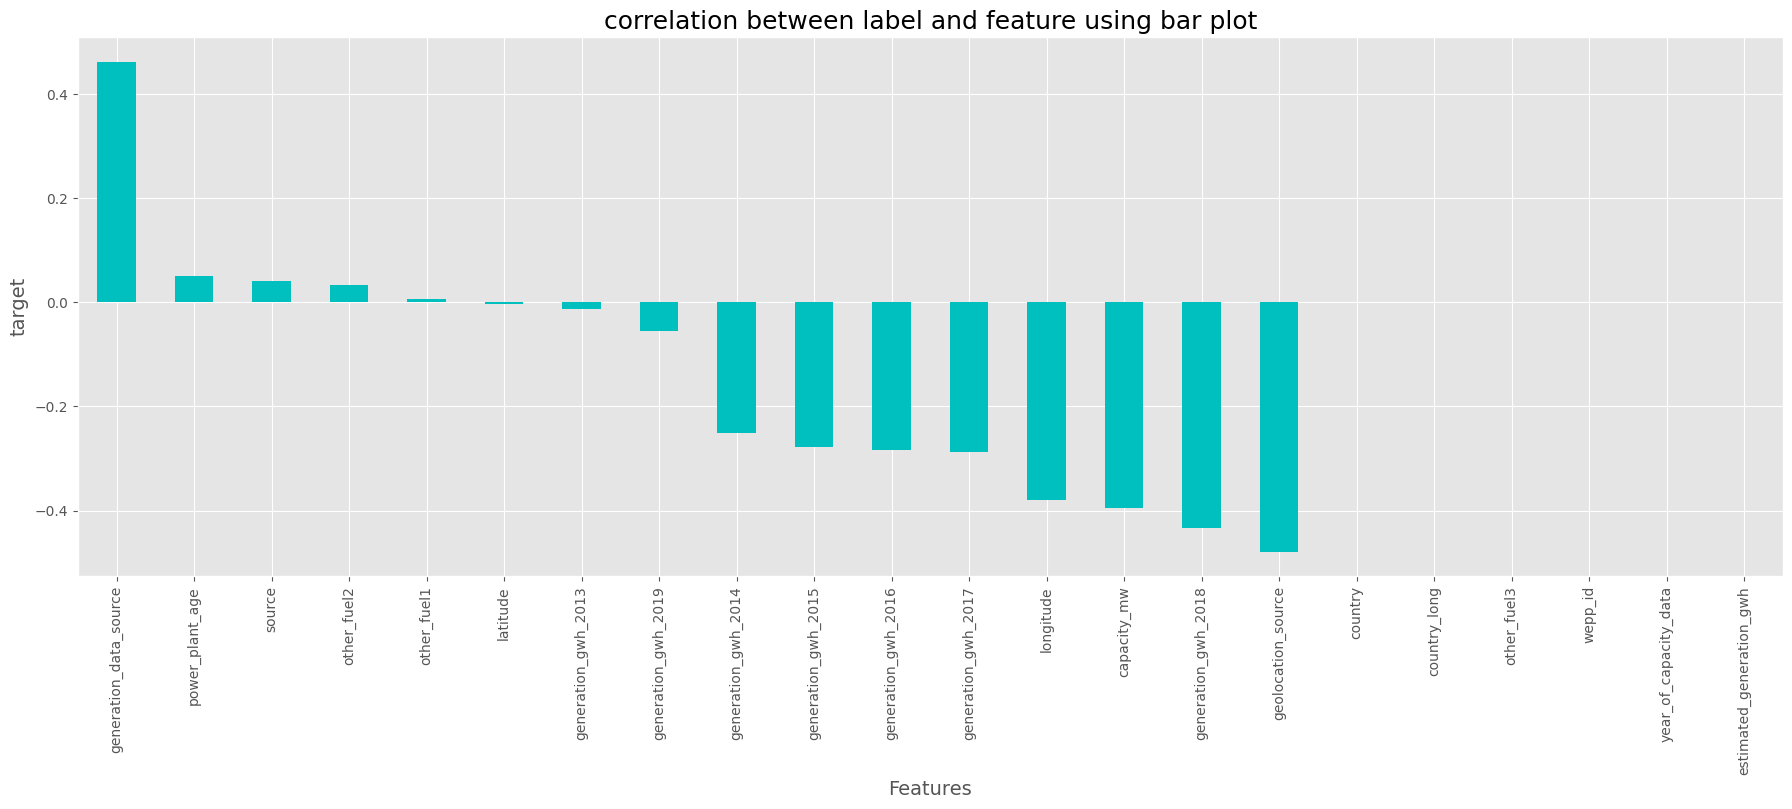

In [76]:
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [77]:
# dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [78]:
new_df.head()

country  country_long  capacity_mw  longitude  primary_fuel  other_fuel2  \
0      NaN             0          2.5    73.2407             6            1   
1      NaN             0         98.0    74.6090             1            1   
2      NaN             0         39.2    69.3732             7            1   
3      NaN             0        135.0    91.3602             2            1   
4      NaN             0       1800.0    82.4091             1            1   

   other_fuel3  source  geolocation_source  wepp_id  ...  generation_gwh_2013  \
0          NaN     109                   1      NaN  ...             14.26400   
1          NaN     174                   2      NaN  ...             14.26400   
2          NaN      21                   2      NaN  ...             14.26400   
3          NaN      22                   2      NaN  ...              2.41461   
4          NaN      22                   2      NaN  ...             14.26400   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           794.587100           697.450781           737.205450   
1           794.587100           697.450781           737.205450   
2           794.587100           697.450781           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0           817.977250                  NaN                    1   
1           817.977250                  NaN                    1   
2           817.977250                  NaN                    1   
3           663.774500           626.239128                    1   
4          5385.579736          7279.000000                    1   

   generation_data_source  estimated_generation_gwh  power_plant_age  
0                       1                       NaN              7.0  
1                       1                       NaN             17.0  
2                       1                       NaN             17.0  
3                       0                       NaN             14.0  
4                       0                       NaN              3.0  

[5 rows x 21 columns]

1. PREDICTION FOR CAPACITY_MW

- SEPERATING THE FEATURES AND LABEL VARIABLES INTO X AND Y

In [79]:
X = new_df.drop('capacity_mw',axis=1)
y = new_df['capacity_mw']

In [80]:
X.shape

(872, 20)

In [81]:
y.shape

(872,)

CHECKING FOR SKEWNESS

In [82]:
X.skew()

country                           NaN
country_long                 0.000000
longitude                    0.958654
primary_fuel                 0.428225
other_fuel2                -29.529646
other_fuel3                       NaN
source                       1.773061
geolocation_source          -2.107415
wepp_id                           NaN
year_of_capacity_data        0.000000
generation_gwh_2013          9.284387
generation_gwh_2014          2.961550
generation_gwh_2015          2.742315
generation_gwh_2016          2.654042
generation_gwh_2017          2.548812
generation_gwh_2018          1.430753
generation_gwh_2019        -29.529646
generation_data_source      -0.064364
estimated_generation_gwh          NaN
power_plant_age              1.713415
dtype: float64

REMOVING SKEWNESS USING YEO_JOHNSON METHOD

In [83]:
skew = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [84]:
X[skew] = pt.fit_transform(X[skew].values)  # Use 'pt' instead of 'scaler'
X[skew].head()

longitude  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0  -0.935366            -0.148106            -0.030782            -0.040480   
1  -0.511731            -0.148106            -0.030782            -0.040480   
2  -2.397374            -0.148106            -0.030782            -0.040480   
3   2.422278            -0.180010            -0.248646             0.118759   
4   1.253873            -0.148106             1.442196             2.297332   

   generation_gwh_2016  generation_gwh_2017  
0            -0.032432            -0.022445  
1            -0.032432            -0.022445  
2            -0.032432            -0.022445  
3             0.118996            -0.186251  
4             2.277965             1.980321

In [85]:
# checking skewness after using yeo-johnson method
X.skew()

country                           NaN
country_long                 0.000000
longitude                   -0.002178
primary_fuel                 0.428225
other_fuel2                -29.529646
other_fuel3                       NaN
source                       1.773061
geolocation_source          -2.107415
wepp_id                           NaN
year_of_capacity_data        0.000000
generation_gwh_2013         -1.462430
generation_gwh_2014          0.224958
generation_gwh_2015          0.163043
generation_gwh_2016          0.139282
generation_gwh_2017          0.121694
generation_gwh_2018          1.430753
generation_gwh_2019        -29.529646
generation_data_source      -0.064364
estimated_generation_gwh          NaN
power_plant_age              1.713415
dtype: float64

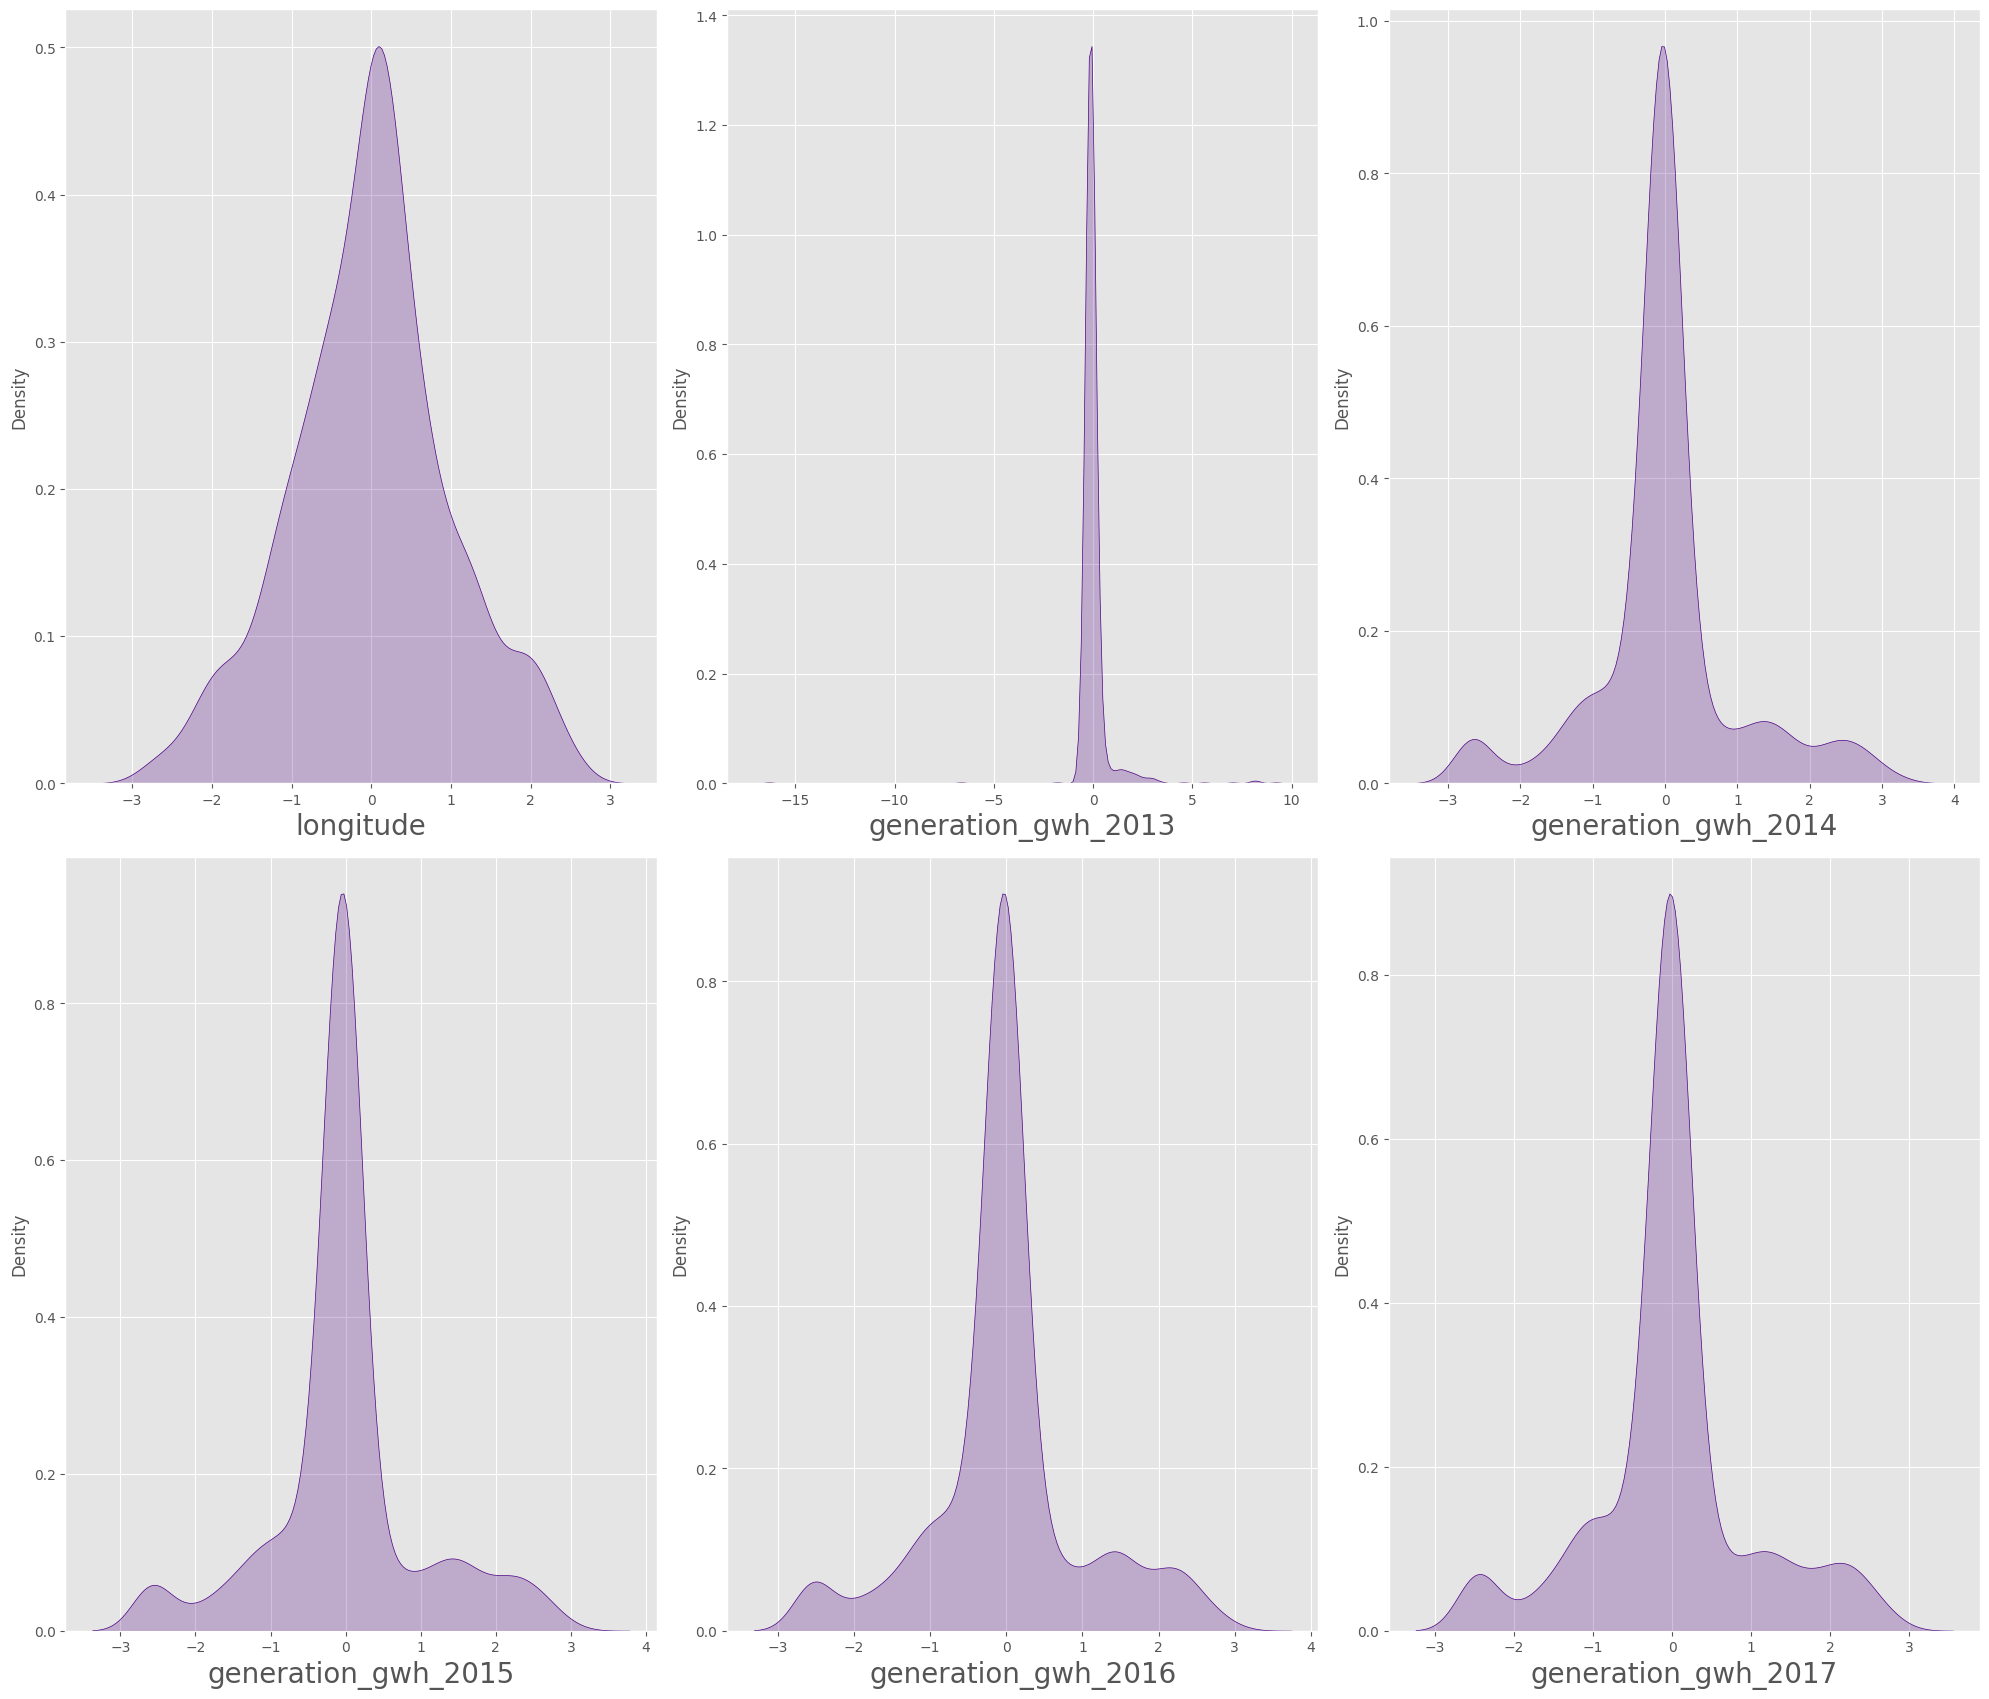

In [86]:
# checking how the data has been distributed in each columns:

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in X[skew]:
   if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(X[column],color='indigo',kde_kws={'shade':True},hist=False)
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

country  country_long  longitude  primary_fuel  other_fuel2  other_fuel3  \
0        NaN           0.0  -0.935366      1.192886     0.033884          NaN   
1        NaN           0.0  -0.511731     -0.983258     0.033884          NaN   
2        NaN           0.0  -2.397375      1.628115     0.033884          NaN   
3        NaN           0.0   2.422277     -0.548029     0.033884          NaN   
4        NaN           0.0   1.253873     -0.983258     0.033884          NaN   
..       ...           ...        ...           ...          ...          ...   
867      NaN           0.0   0.222088     -0.983258     0.033884          NaN   
868      NaN           0.0   0.412178      1.192886     0.033884          NaN   
869      NaN           0.0  -0.235456      1.628115     0.033884          NaN   
870      NaN           0.0  -0.773401     -0.983258     0.033884          NaN   
871      NaN           0.0   0.250983      1.628115     0.033884          NaN   

       source  geolocation_source  wepp_id  year_of_capacity_data  \
0    1.423061           -1.057051      NaN                    NaN   
1    2.859913            0.401412      NaN                    NaN   
2   -0.522215            0.401412      NaN                    NaN   
3   -0.500110            0.401412      NaN                    0.0   
4   -0.500110            0.401412      NaN                    0.0   
..        ...                 ...      ...                    ...   
867 -0.500110            0.401412      NaN                    0.0   
868  0.715688           -2.515514      NaN                    NaN   
869 -0.522215            0.401412      NaN                    NaN   
870  0.317791            0.401412      NaN                    NaN   
871 -0.522215            0.401412      NaN                    NaN   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0              -0.148106            -0.030782            -0.040480   
1              -0.148106            -0.030782            -0.040480   
2              -0.148106            -0.030782            -0.040480   
3              -0.180010            -0.248646             0.118759   
4              -0.148106             1.442196             2.297332   
..                   ...                  ...                  ...   
867            -0.148106            -0.030782            -2.488410   
868            -0.181660            -0.030782            -0.040480   
869            -0.181220            -0.030782            -0.040480   
870            -0.148106            -0.030782            -0.040480   
871            -0.148106            -0.030782            -0.040480   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              -0.032432            -0.022445                  NaN   
1              -0.032432            -0.022445                  NaN   
2              -0.032432            -0.022445                  NaN   
3               0.118996            -0.186251            -0.542911   
4               2.277965             1.980321             2.193168   
..                   ...                  ...                  ...   
867            -0.828049             0.023413            -0.518127   
868            -0.032432            -0.022445                  NaN   
869            -0.032432            -0.022445                  NaN   
870            -0.032432            -0.022445                  NaN   
871            -0.032432            -0.022445                  NaN   

     generation_gwh_2019  generation_data_source  estimated_generation_gwh  \
0               0.033884                0.968389                       NaN   
1               0.033884                0.968389                       NaN   
2               0.033884                0.968389                       NaN   
3               0.033884               -1.032643                       NaN   
4               0.033884               -1.032643                       NaN   
..                   ...                     ...     

CHECKING VIF (VARIANCE INFLATION FACTOR) VALUES

In [88]:
X.columns

Index(['country', 'country_long', 'longitude', 'primary_fuel', 'other_fuel2',
       'other_fuel3', 'source', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh', 'power_plant_age'],
      dtype='object')

In [93]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X is defined
# X = ...

# Replace infinite values with NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaNs and infinite values
print("Initial shape:", X.shape)
print("Missing values before cleaning:\n", X.isnull().sum())

# Drop columns with all NaNs or infinite values
X.dropna(axis=1, how='all', inplace=True)

# Drop rows with any NaNs or infinite values
X.dropna(axis=0, how='any', inplace=True)

# Check if DataFrame is empty after cleaning
if X.empty:
    raise ValueError("DataFrame is empty after removing rows and columns with NaNs or infinite values.")

print("Shape after cleaning:", X.shape)
print("Missing values after cleaning:\n", X.isnull().sum())

# Calculate VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Check the values
print(vif)


Initial shape: (872, 20)
Missing values before cleaning:
 country                     872
country_long                  0
longitude                     0
primary_fuel                  0
other_fuel2                   0
other_fuel3                 872
source                        0
geolocation_source            0
wepp_id                     872
year_of_capacity_data       387
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018         451
generation_gwh_2019           0
generation_data_source        0
estimated_generation_gwh    872
power_plant_age               0
dtype: int64
Shape after cleaning: (416, 16)
Missing values after cleaning:
 country_long              0
longitude                 0
primary_fuel              0
other_fuel2               0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
g

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["features"] = X.columns

# let's check the values
vif

VIF values                features
0          NaN            country_long
1     1.086081               longitude
2     1.583842            primary_fuel
3     1.009409             other_fuel2
4     0.125263                  source
5     0.000000      geolocation_source
6          NaN   year_of_capacity_data
7     1.002702     generation_gwh_2013
8     3.529900     generation_gwh_2014
9     6.214729     generation_gwh_2015
10   10.073724     generation_gwh_2016
11    7.416881     generation_gwh_2017
12    4.072508     generation_gwh_2018
13    0.002120     generation_gwh_2019
14    0.047695  generation_data_source
15    1.270659         power_plant_age

In [95]:
X.head()

country_long  longitude  primary_fuel  other_fuel2   source  \
3           0.0   2.422277     -0.548029     0.033884 -0.50011   
4           0.0   1.253873     -0.983258     0.033884 -0.50011   
5           0.0  -2.725029     -0.983258     0.033884 -0.50011   
6           0.0   0.136653     -0.112800     0.033884 -0.50011   
7           0.0   0.185674     -0.112800     0.033884 -0.50011   

   geolocation_source  year_of_capacity_data  generation_gwh_2013  \
3            0.401412                    0.0            -0.180010   
4            0.401412                    0.0            -0.148106   
5            0.401412                    0.0            -0.183045   
6            0.401412                    0.0            -0.171917   
7            0.401412                    0.0            -0.188062   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
3            -0.248646             0.118759             0.118996   
4             1.442196             2.297332             2.277965   
5             0.322732             0.442037             0.366987   
6            -1.187735            -1.063229            -1.491355   
7            -0.174573            -0.012898            -0.101611   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
3            -0.186251            -0.542911             0.033884   
4             1.980321             2.193168             0.033884   
5             0.264509            -0.398795             0.033884   
6            -1.352040            -0.780588             0.033884   
7            -0.168256            -0.562208             0.033884   

   generation_data_source  power_plant_age  
3               -1.032643        -0.400190  
4               -1.032643        -1.222693  
5               -1.032643        -0.474963  
6               -1.032643         2.142092  
7               -1.032643        -0.848828

MODELLING

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [118]:
from operator import mod
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is',maxAccu,'on random state',maxRS)

Maximum r2 score is 0.01014934137656387 on random state 3


CREATING NEW TRAIN TEST SPLIT

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

REGRESSION ALGORITHMS

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

RANDOM FOREST REGRESSOR

In [121]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

# Prediction
predRFR = RFR.predict(X_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test,predRFR))
print('MSE:',mean_squared_error(y_test,predRFR))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predRFR)))

R2_Score: -0.01871187872941582
MAE: 316.20759962666665
MSE: 199630.54534593492
RMSE: 446.80034170301946


DECISION TREE REGRESSOR

In [122]:
# Checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

# Prediction
predDTR = DTR.predict(X_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test,predDTR))
print('MSE:',mean_squared_error(y_test,predDTR))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predDTR)))

R2_Score: -0.5353125996479493
MAE: 316.98452800000007
MSE: 300865.53219196794
RMSE: 548.5121076074511


KNEIGHBORS REGRESSOR

In [123]:
# Checking r2 score for kneighbors regressors
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3) # Set n_neighbors to be less than or equal to the number of samples
knn.fit(X_train,y_train)

# Prediction
predknn = knn.predict(X_test) # Call predict on the knn object
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test,predknn))
print('MSE:',mean_squared_error(y_test,predknn))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predknn)))

R2_Score: -0.3085471760047773
MAE: 319.579472
MSE: 256427.74155390222
RMSE: 506.38694844348254


GRADIENT BOOSTING REGRESSOR

In [124]:
# Checking r2 score for gradient boosting regressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)

# Prediction
predGBR = GBR.predict(X_test)
print('R2_Score:',r2_score(y_test,predGBR))
print('MAE:',mean_absolute_error(y_test,predGBR))
print('MSE:',mean_squared_error(y_test,predGBR))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predGBR)))

R2_Score: -0.13706806423972595
MAE: 325.2126975924359
MSE: 222824.06095307323
RMSE: 472.0424355426885


BAGGING REGRESSOR

In [125]:
# Checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(X_train,y_train)

# Prediction
predBR = BR.predict(X_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test,predBR))
print('MSE:',mean_squared_error(y_test,predBR))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predBR)))

R2_Score: -0.020061328083583074
MAE: 305.2106992
MSE: 199894.9884295133
RMSE: 447.0961735795927


CHECKING THE CROSS VALIDATION SCORE

In [126]:
# Checking cv score for Random Forest Regressor
print('Cross Validation Score for Random Forest Regressor:',cross_val_score(RFR,X,y,cv=5).mean())

Cross Validation Score for Random Forest Regressor: -0.35227545872165805


In [127]:
# Checking cv score for Decision Regressor
print('Cross Validation Score for Decision Regressor:',cross_val_score(DTR,X,y,cv=5).mean())

Cross Validation Score for Decision Regressor: -1.4212874767240877


In [128]:
# Checking cv score KNN Regressor
print('Cross Validation Score for KNN Regressor:',cross_val_score(knn,X,y,cv=5).mean())

Cross Validation Score for KNN Regressor: -0.5226468729565219


In [129]:
# Checking cv score for Gradient Boosting Regressor
print('Cross Validation Score for Gradient Boosting Regressor:',cross_val_score(GBR,X,y,cv=5).mean())

Cross Validation Score for Gradient Boosting Regressor: -0.5620258221303134


HYPER PARAMETER TUNING

In [130]:
from inspect import Parameter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Random Forest Regressor
Parameters = {'criterion':['squared_error','absolute_error'], # Update criterion options
              'max_features':['auto','sqrt','log2'],
              'n_estimators':[10, 50, 100, 200], # Start n_estimators from a non-zero value
              'max_depth':[2,3,4,6]}

# Adjust the number of cross-validation folds to be less than or equal to the number of samples
GCV = GridSearchCV(RandomForestRegressor(),Parameters,cv=min(5, len(X_train)))
GCV.fit(X_train,y_train)
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [131]:
capacity = RandomForestRegressor(criterion='squared_error', max_depth=4, max_features='auto', n_estimators=200) # Change 'mse' to 'squared_error'
capacity.fit(X_train,y_train)
pred_capacity = capacity.predict(X_test)
# Use pred_capacity instead of predRFR
print("RMSE value",np.sqrt(metrics.mean_squared_error(y_test,pred_capacity)))
print("R2 value",metrics.r2_score(y_test,pred_capacity)*100)

RMSE value 440.32797589885644
R2 value 1.0588543193398303


SAVING THE MODEL

In [132]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

2. PREDICTION FOR FUEL_TYPE

- SEPERATING THE FEATURES AND LABEL VARIABLES INTO X_DF AND Y_DF

In [133]:
X_df = new_df.drop('primary_fuel',axis=1)
y_df = new_df['primary_fuel']

In [134]:
X_df.shape

(872, 20)

In [135]:
y_df.shape

(872,)

CHECKING FOR SKEWNESS

In [136]:
X_df.skew()

country                           NaN
country_long                 0.000000
capacity_mw                  2.222690
longitude                    0.958654
other_fuel2                -29.529646
other_fuel3                       NaN
source                       1.773061
geolocation_source          -2.107415
wepp_id                           NaN
year_of_capacity_data        0.000000
generation_gwh_2013          9.284387
generation_gwh_2014          2.961550
generation_gwh_2015          2.742315
generation_gwh_2016          2.654042
generation_gwh_2017          2.548812
generation_gwh_2018          1.430753
generation_gwh_2019        -29.529646
generation_data_source      -0.064364
estimated_generation_gwh          NaN
power_plant_age              1.713415
dtype: float64

REMOVING SKEWNESS USING YEO-JOHNSON METHOD

In [137]:
skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [138]:
X_df[skew] = scaler.fit_transform(X_df[skew].values)  # Use 'pt' instead of 'scaler'
X_df[skew].head()

capacity_mw  longitude  generation_gwh_2013  generation_gwh_2014  \
0    -1.684693  -0.935366            -0.148106            -0.030782   
1     0.236269  -0.511731            -0.148106            -0.030782   
2    -0.260515  -2.397374            -0.148106            -0.030782   
3     0.407721   2.422278            -0.180010            -0.248646   
4     1.736275   1.253873            -0.148106             1.442196   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.040480            -0.032432            -0.022445   
1            -0.040480            -0.032432            -0.022445   
2            -0.040480            -0.032432            -0.022445   
3             0.118759             0.118996            -0.186251   
4             2.297332             2.277965             1.980321   

   power_plant_age  
0        -1.046115  
1         0.019813  
2         0.019813  
3        -0.246498  
4        -1.748161

In [139]:
# checking skewness after using yeo-johnson method
X_df.skew()

country                           NaN
country_long                 0.000000
capacity_mw                  0.019636
longitude                   -0.002178
other_fuel2                -29.529646
other_fuel3                       NaN
source                       1.773061
geolocation_source          -2.107415
wepp_id                           NaN
year_of_capacity_data        0.000000
generation_gwh_2013         -1.462430
generation_gwh_2014          0.224958
generation_gwh_2015          0.163043
generation_gwh_2016          0.139282
generation_gwh_2017          0.121694
generation_gwh_2018          1.430753
generation_gwh_2019        -29.529646
generation_data_source      -0.064364
estimated_generation_gwh          NaN
power_plant_age              0.049592
dtype: float64

In [140]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in X_df[skew]:
   if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(X_df[column],color='indigo',kde_kws={'shade':True},hist=False)
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df = pd.DataFrame(scaler.fit_transform(X_df), columns=X_df.columns)
X_df

country  country_long  capacity_mw  longitude  other_fuel2  other_fuel3  \
0        NaN           0.0    -1.684693  -0.935366     0.033884          NaN   
1        NaN           0.0     0.236269  -0.511731     0.033884          NaN   
2        NaN           0.0    -0.260515  -2.397375     0.033884          NaN   
3        NaN           0.0     0.407721   2.422277     0.033884          NaN   
4        NaN           0.0     1.736275   1.253873     0.033884          NaN   
..       ...           ...          ...        ...          ...          ...   
867      NaN           0.0     1.678231   0.222088     0.033884          NaN   
868      NaN           0.0    -1.603711   0.412178     0.033884          NaN   
869      NaN           0.0    -0.495389  -0.235456     0.033884          NaN   
870      NaN           0.0     0.126963  -0.773401     0.033884          NaN   
871      NaN           0.0    -0.732573   0.250983     0.033884          NaN   

       source  geolocation_source  wepp_id  year_of_capacity_data  \
0    1.423061           -1.057051      NaN                    NaN   
1    2.859913            0.401412      NaN                    NaN   
2   -0.522215            0.401412      NaN                    NaN   
3   -0.500110            0.401412      NaN                    0.0   
4   -0.500110            0.401412      NaN                    0.0   
..        ...                 ...      ...                    ...   
867 -0.500110            0.401412      NaN                    0.0   
868  0.715688           -2.515514      NaN                    NaN   
869 -0.522215            0.401412      NaN                    NaN   
870  0.317791            0.401412      NaN                    NaN   
871 -0.522215            0.401412      NaN                    NaN   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0              -0.148106            -0.030782            -0.040480   
1              -0.148106            -0.030782            -0.040480   
2              -0.148106            -0.030782            -0.040480   
3              -0.180010            -0.248646             0.118759   
4              -0.148106             1.442196             2.297332   
..                   ...                  ...                  ...   
867            -0.148106            -0.030782            -2.488410   
868            -0.181660            -0.030782            -0.040480   
869            -0.181220            -0.030782            -0.040480   
870            -0.148106            -0.030782            -0.040480   
871            -0.148106            -0.030782            -0.040480   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              -0.032432            -0.022445                  NaN   
1              -0.032432            -0.022445                  NaN   
2              -0.032432            -0.022445                  NaN   
3               0.118996            -0.186251            -0.542911   
4               2.277965             1.980321             2.193168   
..                   ...                  ...                  ...   
867            -0.828049             0.023413            -0.518127   
868            -0.032432            -0.022445                  NaN   
869            -0.032432            -0.022445                  NaN   
870            -0.032432            -0.022445                  NaN   
871            -0.032432            -0.022445                  NaN   

     generation_gwh_2019  generation_data_source  estimated_generation_gwh  \
0               0.033884                0.968389                       NaN   
1               0.033884                0.968389                       NaN   
2               0.033884                0.968389                       NaN   
3               0.033884               -1.032643                       NaN   
4               0.033884               -1.032643                       NaN   
..                   ...                     ...                 

CHECKING VIF VALUES

In [142]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_df is defined
# X_df = ...

# Replace infinite values with NaNs
X_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaNs and infinite values
print("Initial shape:", X_df.shape)
print("Missing values before cleaning:\n", X_df.isnull().sum())

# Drop columns with all NaNs or infinite values
X_df.dropna(axis=1, how='all', inplace=True)

# Drop rows with any NaNs or infinite values
X_df.dropna(axis=0, how='any', inplace=True)

# Check if DataFrame is empty after cleaning
if X_df.empty:
    raise ValueError("DataFrame is empty after removing rows and columns with NaNs or infinite values.")

print("Shape after cleaning:", X_df.shape)
print("Missing values after cleaning:\n", X_df.isnull().sum())

# Calculate VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns

# Check the values
print(vif)

Initial shape: (872, 20)
Missing values before cleaning:
 country                     872
country_long                  0
capacity_mw                   0
longitude                     0
other_fuel2                   0
other_fuel3                 872
source                        0
geolocation_source            0
wepp_id                     872
year_of_capacity_data       387
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018         451
generation_gwh_2019           0
generation_data_source        0
estimated_generation_gwh    872
power_plant_age               0
dtype: int64
Shape after cleaning: (416, 16)
Missing values after cleaning:
 country_long              0
capacity_mw               0
longitude                 0
other_fuel2               0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
g

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif ["VIF values"] = [variance_inflation_factor(X_df.values,i)
              for i in range(len(X_df.columns))]
vif["features"] = X_df.columns

# let's check the values
vif

VIF values                features
0          NaN            country_long
1     2.990127             capacity_mw
2     1.082633               longitude
3     1.006132             other_fuel2
4     0.030213                  source
5     0.000000      geolocation_source
6          NaN   year_of_capacity_data
7     1.011897     generation_gwh_2013
8     3.649311     generation_gwh_2014
9     6.238322     generation_gwh_2015
10   10.064329     generation_gwh_2016
11    7.675839     generation_gwh_2017
12    4.206280     generation_gwh_2018
13    0.009853     generation_gwh_2019
14    0.003351  generation_data_source
15    1.347359         power_plant_age

In [144]:
y_df.value_counts()

primary_fuel
3    240
1    239
6    126
7    123
2     65
0     50
5     20
4      9
Name: count, dtype: int64

OVERSAMPLING

In [156]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variables, respectively
# X and y should be already defined and aligned properly

# Check if y is continuous and convert to categorical if needed
if y.dtype in ['float', 'int']:  # Check if y is numeric
    # You'll need to decide on appropriate thresholds for categorization
    # Here's an example assuming you want to create two classes:
    y = (y > y.median()).astype(int)  # Convert to binary classes based on median

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to X and y
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now X_resampled and y_resampled should have balanced classes
print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())

Original class distribution: capacity_mw
0    209
1    207
Name: count, dtype: int64
Resampled class distribution: capacity_mw
0    209
1    209
Name: count, dtype: int64


In [157]:
y_df.value_counts()

primary_fuel
3    240
1    239
6    126
7    123
2     65
0     50
5     20
4      9
Name: count, dtype: int64

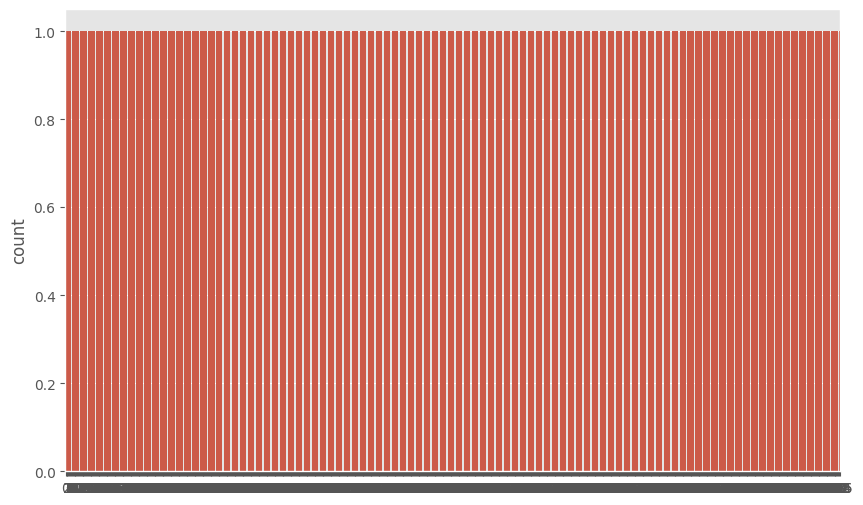

In [159]:
# visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

In [160]:
X_df.head()

country_long  capacity_mw  longitude  other_fuel2   source  \
3           0.0     0.407721   2.422277     0.033884 -0.50011   
4           0.0     1.736275   1.253873     0.033884 -0.50011   
5           0.0     0.733440  -2.725029     0.033884 -0.50011   
6           0.0    -0.028771   0.136653     0.033884 -0.50011   
7           0.0     0.594601   0.185674     0.033884 -0.50011   

   geolocation_source  year_of_capacity_data  generation_gwh_2013  \
3            0.401412                    0.0            -0.180010   
4            0.401412                    0.0            -0.148106   
5            0.401412                    0.0            -0.183045   
6            0.401412                    0.0            -0.171917   
7            0.401412                    0.0            -0.188062   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
3            -0.248646             0.118759             0.118996   
4             1.442196             2.297332             2.277965   
5             0.322732             0.442037             0.366987   
6            -1.187735            -1.063229            -1.491355   
7            -0.174573            -0.012898            -0.101611   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
3            -0.186251            -0.542911             0.033884   
4             1.980321             2.193168             0.033884   
5             0.264509            -0.398795             0.033884   
6            -1.352040            -0.780588             0.033884   
7            -0.168256            -0.562208             0.033884   

   generation_data_source  power_plant_age  
3               -1.032643        -0.246498  
4               -1.032643        -1.748161  
5               -1.032643        -0.342978  
6               -1.032643         1.823102  
7               -1.032643        -0.909202

MODELLING
- FINDING THE BEST RANDOM STATE

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to track the best accuracy and corresponding random state
maxAccu = 0
bestRandomState = 0

# Loop through different random states and train the model
for random_state in range(1, 200):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

    # Initialize the model
    model = DecisionTreeClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Check if this random state gives a better accuracy
    if acc > maxAccu:
        maxAccu = acc
        bestRandomState = random_state

# Print the best accuracy and corresponding random state found
print('Best accuracy is', maxAccu, 'on random state', bestRandomState)


Best accuracy is 0.6 on random state 47


CREATE TRAIN TEST SPLIT

In [180]:
# Check the shapes of your dataframes before splitting
print("Shape of X_df:", X_df.shape)
print("Shape of y_df:", y_df.shape)

# Investigate why the shapes don't match and fix the issue.
# For example, if y_df has duplicate rows, you might need to drop them:
# y_df = y_df.drop_duplicates()

# If you need to add samples to y_df to match X_df you could try:
from sklearn.utils import resample
y_df = resample(y_df, replace=True, n_samples=X_df.shape[0], random_state=123) # Resample y_df to have the same number of samples as X_df

# After fixing the issue, proceed with train_test_split
X_df_train,X_df_test,y_df_train,y_df_test = train_test_split(X_df,y_df,test_size=.30,random_state=maxRS)

Shape of X_df: (416, 16)
Shape of y_df: (8,)


In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

DECISION TREE CLASSIFIER

In [183]:
# Checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_df_train,y_df_train)

# Prediction
predDTC = DTC.predict(X_df_test)

print(accuracy_score(y_df_test,predDTC))
print(confusion_matrix(y_df_test,predDTC))
print(classification_report(y_df_test,predDTC))

0.136
[[1 3 2 1 2 3 1 0]
 [2 3 2 1 3 1 4 0]
 [2 4 3 1 5 2 2 1]
 [2 1 3 3 2 0 1 1]
 [0 5 1 2 0 2 1 0]
 [1 6 4 3 1 5 3 3]
 [2 2 2 1 1 0 1 2]
 [3 4 0 3 1 1 2 1]]
              precision    recall  f1-score   support

           0       0.08      0.08      0.08        13
           1       0.11      0.19      0.14        16
           2       0.18      0.15      0.16        20
           3       0.20      0.23      0.21        13
           4       0.00      0.00      0.00        11
           5       0.36      0.19      0.25        26
           6       0.07      0.09      0.08        11
           7       0.12      0.07      0.09        15

    accuracy                           0.14       125
   macro avg       0.14      0.12      0.13       125
weighted avg       0.17      0.14      0.14       125



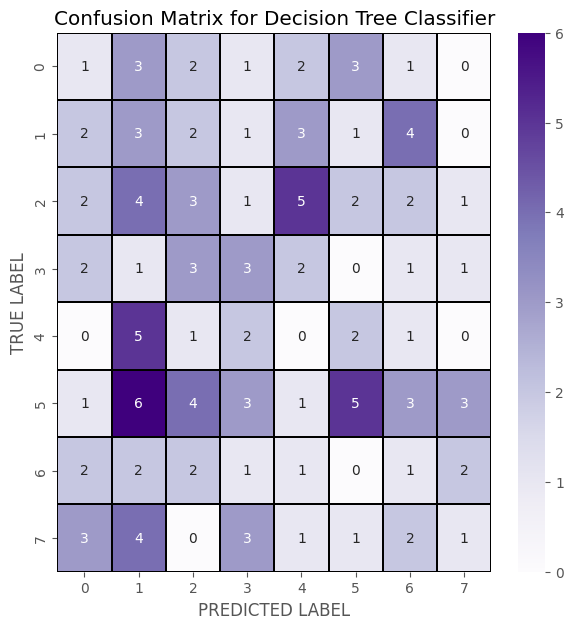

In [185]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)


X_axis_labels = ["0", "1","2","3","4","5","6","7"]
Y_axis_labels = ["0", "1","2","3","4","5","6","7"]
f, ax = plt.subplots(figsize =(7, 7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=X_axis_labels, yticklabels=Y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

RANDOM FOREST CLASSIFIER

In [186]:
RFC = RandomForestClassifier()
RFC.fit(X_df_train,y_df_train)

# Prediction
predRFC = RFC.predict(X_df_test)

print(accuracy_score(y_df_test,predRFC))
print(confusion_matrix(y_df_test,predRFC))
print(classification_report(y_df_test,predRFC))

0.112
[[1 2 2 1 2 3 1 1]
 [2 1 2 3 5 1 1 1]
 [2 3 5 1 5 3 1 0]
 [0 0 3 1 4 2 1 2]
 [3 2 3 0 1 2 0 0]
 [5 5 1 4 3 3 2 3]
 [3 3 2 0 1 1 0 1]
 [3 3 0 1 2 2 2 2]]
              precision    recall  f1-score   support

           0       0.05      0.08      0.06        13
           1       0.05      0.06      0.06        16
           2       0.28      0.25      0.26        20
           3       0.09      0.08      0.08        13
           4       0.04      0.09      0.06        11
           5       0.18      0.12      0.14        26
           6       0.00      0.00      0.00        11
           7       0.20      0.13      0.16        15

    accuracy                           0.11       125
   macro avg       0.11      0.10      0.10       125
weighted avg       0.13      0.11      0.12       125



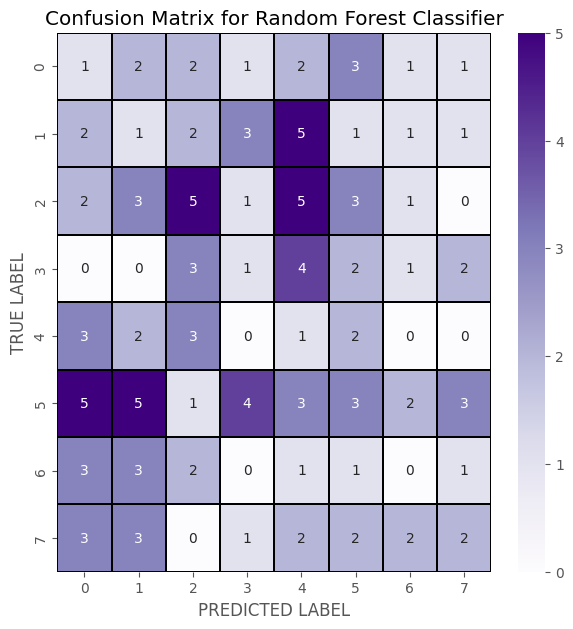

In [187]:
#Let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)


X_axis_labels = ["0", "1","2","3","4","5","6","7"]
Y_axis_labels = ["0", "1","2","3","4","5","6","7"]
f, ax = plt.subplots(figsize =(7, 7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=X_axis_labels, yticklabels=Y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

SUPPORT VECTOR CLASSIFIER

In [189]:
svc = SVC()
svc.fit(X_df_train,y_df_train)

# Prediction
predsvc = svc.predict(X_df_test)

print(accuracy_score(y_df_test,predsvc))
print(confusion_matrix(y_df_test,predsvc))
print(classification_report(y_df_test,predsvc))

0.088
[[ 0  1  3  3  4  0  1  1]
 [ 2  3  3  3  4  1  0  0]
 [ 0  4  4  4  4  0  1  3]
 [ 0  3  2  1  4  1  0  2]
 [ 0  3  4  2  2  0  0  0]
 [ 1 13  5  3  2  0  0  2]
 [ 0  5  1  3  1  1  0  0]
 [ 0  6  3  1  4  0  0  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.08      0.19      0.11        16
           2       0.16      0.20      0.18        20
           3       0.05      0.08      0.06        13
           4       0.08      0.18      0.11        11
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        11
           7       0.11      0.07      0.08        15

    accuracy                           0.09       125
   macro avg       0.06      0.09      0.07       125
weighted avg       0.06      0.09      0.07       125



In [190]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)

X_axis_labels = ["0", "1","2","3","4","5","6","7"]
Y_axis_labels = ["0", "1","2","3","4","5","6","7"]

f, ax = plt.subplots(figsize =(7, 7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=X_axis_labels, yticklabels=Y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

KNEIGHBORS CLASSIFIER

In [191]:
knn = KNN()
knn.fit(X_df_train,y_df_train)

# Prediction
predknn = knn.predict(X_df_test)

print(accuracy_score(y_df_test,predknn))
print(confusion_matrix(y_df_test,predknn))
print(classification_report(y_df_test,predknn))

0.048
[[ 0  6  2  2  2  0  1  0]
 [ 5  0  4  4  1  1  1  0]
 [ 3  3  2  2  5  2  2  1]
 [ 1  4  3  0  2  1  1  1]
 [ 4  1  2  1  1  0  1  1]
 [ 7 11  4  1  0  1  0  2]
 [ 2  2  3  1  2  0  1  0]
 [ 5  2  3  1  1  1  1  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        16
           2       0.09      0.10      0.09        20
           3       0.00      0.00      0.00        13
           4       0.07      0.09      0.08        11
           5       0.17      0.04      0.06        26
           6       0.12      0.09      0.11        11
           7       0.17      0.07      0.10        15

    accuracy                           0.05       125
   macro avg       0.08      0.05      0.05       125
weighted avg       0.09      0.05      0.06       125



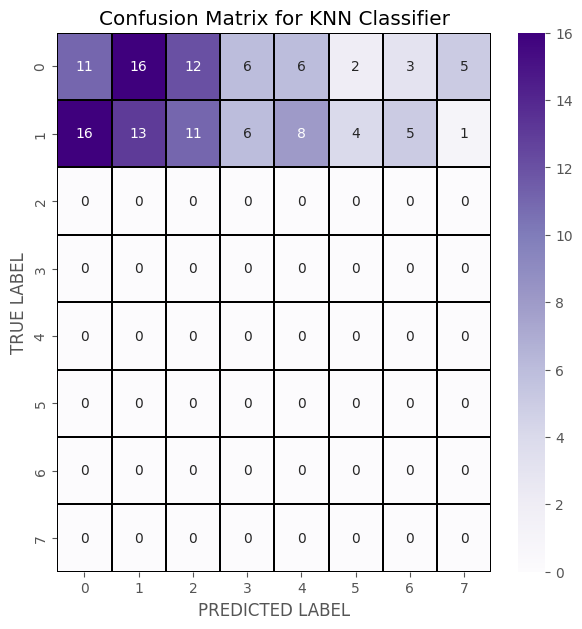

In [194]:
# LET'S plot confusion matrix for KNN
cm = confusion_matrix(y_test,predknn)

X_axis_labels = ["0","1","2","3","4","5","6","7"]
Y_axis_labels = ["0","1","2","3","4","5","6","7"]

f, ax = plt.subplots(figsize =(7, 7))
# Use the correct variable name 'Y_axis_labels'
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=X_axis_labels, yticklabels=Y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

GRADIENT BOOSTING CLASSIFIER

In [195]:
GB = GradientBoostingClassifier()
GB.fit(X_df_train,y_df_train)

# Prediction
predGB = GB.predict(X_df_test)

print(accuracy_score(y_df_test,predGB))
print(confusion_matrix(y_df_test,predGB))
print(classification_report(y_df_test,predGB))

0.096
[[2 4 2 0 1 3 1 0]
 [3 1 3 1 3 4 1 0]
 [1 1 4 1 7 3 1 2]
 [2 4 1 0 3 2 1 0]
 [2 1 1 4 2 1 0 0]
 [3 6 3 3 4 2 4 1]
 [1 3 1 0 2 0 1 3]
 [4 2 2 1 5 1 0 0]]
              precision    recall  f1-score   support

           0       0.11      0.15      0.13        13
           1       0.05      0.06      0.05        16
           2       0.24      0.20      0.22        20
           3       0.00      0.00      0.00        13
           4       0.07      0.18      0.11        11
           5       0.12      0.08      0.10        26
           6       0.11      0.09      0.10        11
           7       0.00      0.00      0.00        15

    accuracy                           0.10       125
   macro avg       0.09      0.10      0.09       125
weighted avg       0.10      0.10      0.09       125



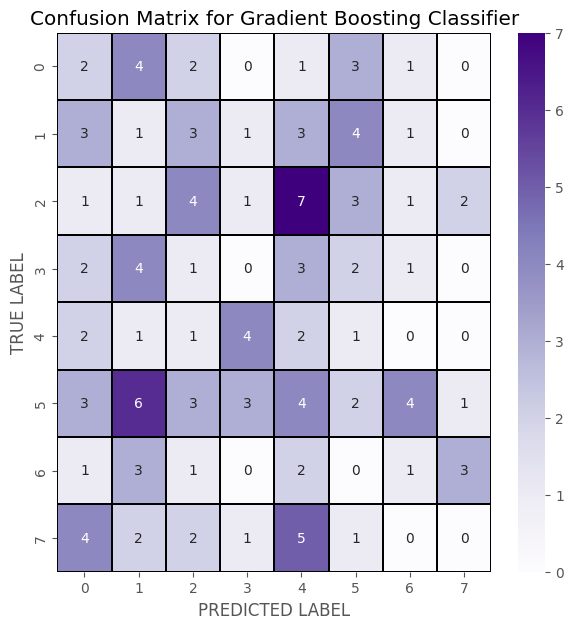

In [196]:
# Let's plot confusion matrix for GB
cm = confusion_matrix(y_df_test,predGB)

X_axis_labels = ["0", "1","2","3","4","5","6","7"]
Y_axis_labels = ["0", "1","2","3","4","5","6","7"]

f, ax = plt.subplots(figsize =(7, 7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=X_axis_labels, yticklabels=Y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

BAGGING CLASSIFIER

In [197]:
BC = BaggingClassifier()
BC.fit(X_df_train,y_df_train)

# Prediction
predBC = BC.predict(X_df_test)

print(accuracy_score(y_df_test,predBC))
print(confusion_matrix(y_df_test,predBC))
print(classification_report(y_df_test,predBC))

0.12
[[2 4 2 0 2 1 0 2]
 [3 1 2 1 4 1 3 1]
 [2 2 5 1 5 1 4 0]
 [2 2 3 0 3 1 2 0]
 [2 2 3 0 2 0 1 1]
 [4 5 4 3 1 4 4 1]
 [3 3 2 0 2 0 1 0]
 [3 5 2 1 1 2 1 0]]
              precision    recall  f1-score   support

           0       0.10      0.15      0.12        13
           1       0.04      0.06      0.05        16
           2       0.22      0.25      0.23        20
           3       0.00      0.00      0.00        13
           4       0.10      0.18      0.13        11
           5       0.40      0.15      0.22        26
           6       0.06      0.09      0.07        11
           7       0.00      0.00      0.00        15

    accuracy                           0.12       125
   macro avg       0.11      0.11      0.10       125
weighted avg       0.15      0.12      0.12       125



In [198]:
# Let's plot confusion matrix for BC

cm = confusion_matrix(y_df_test,predBC)

X_axis_labels = ["0", "1","2","3","4","5","6","7"]
Y_axis_labels = ["0", "1","2","3","4","5","6","7"]

f, ax = plt.subplots(figsize =(7, 7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=X_axis_labels, yticklabels=Y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

CHECKING THE CROSS VALIDATION SCORE

In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
# cv score for Decision Tree Classifier
print('Cross Validation Score for Decision Tree Classifier:',cross_val_score(DTC,X_df,y_df,cv=5).mean())

Cross Validation Score for Decision Tree Classifier: 0.14176706827309235


In [201]:
# cv score for Random Forest Classifier
print('Cross Validation Score for Random Forest Classifier:',cross_val_score(RFC,X_df,y_df,cv=5).mean())

Cross Validation Score for Random Forest Classifier: 0.12991967871485943


In [202]:
# cv score for Support Vector Classifier
print('Cross Validation Score for Support Vector Classifier:',cross_val_score(svc,X_df,y_df,cv=5).mean())

Cross Validation Score for Support Vector Classifier: 0.17071141709695925


In [203]:
# cv score for KNeighbors Classifier
print('Cross Validation Score for KNeighbors Classifier:',cross_val_score(knn,X_df,y_df,cv=5).mean())

Cross Validation Score for KNeighbors Classifier: 0.11781411359724614


In [204]:
# cv score for Gradient Boosting Classifier
print('Cross Validation Score for Gradient Boosting Classifier:',cross_val_score(GB,X_df,y_df,cv=5).mean())

Cross Validation Score for Gradient Boosting Classifier: 0.1419391853126793


In [205]:
# cv score for Bagging Classifier
print('Cross Validation Score for Bagging Classifier:',cross_val_score(BC,X_df,y_df,cv=5).mean())

Cross Validation Score for Bagging Classifier: 0.14411933448078026


HYPER PARAMETER TUNING

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
# Gradient Boosting Classifier
parameters = {'criterion': ['friedman_mse','mse','mae'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':[2,3,4,5,6,8]}

GCV = GridSearchCV(GB,parameters,cv=5)
GCV.fit(X_df_train,y_df_train)
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 2, 'max_features': 'log2'}

In [208]:
primary_fuel = GradientBoostingClassifier(criterion='friedman_mse', max_depth=8, max_features='log2',n_estimators=200)
primary_fuel.fit(X_df_train,y_df_train)
pred_primary_fuel = primary_fuel.predict(X_df_test)
acc= accuracy_score(y_df_test,pred_primary_fuel)
print(acc*100)

11.200000000000001


PLOTTING ROC AND COMPARE AUC FOR THE FINAL MODEL

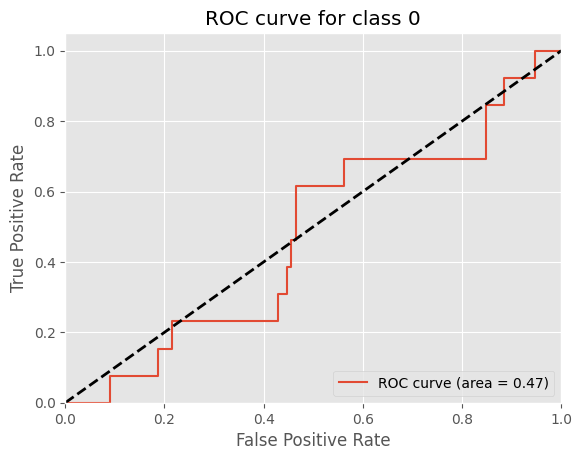

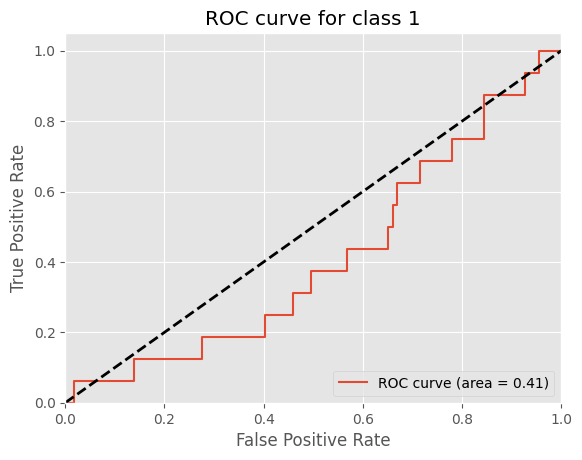

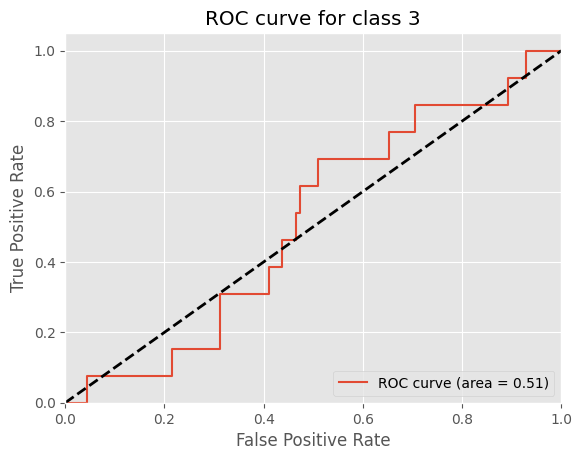

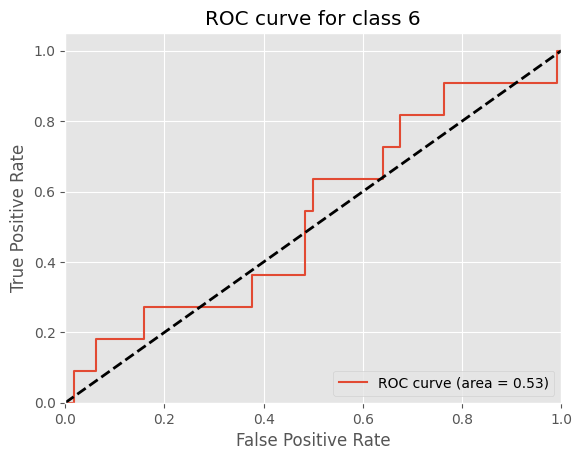

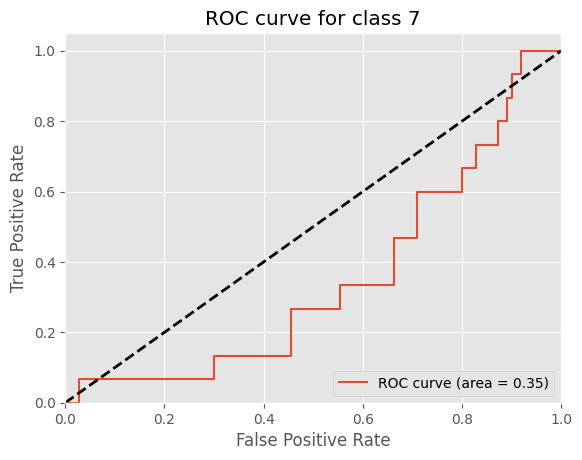

In [209]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(X_df_train, y_df_train).predict_proba(X_df_test)

#Binarize the output
y_df_test_bin = label_binarize(y_df_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = 8

# compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])


for i in range(n_classes):
    plt.figure()
    plt.plot(false_positive_rate[i], true_positive_rate[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for class %d' % i)
    plt.legend(loc="lower right")
    plt.show()

SAVING THE MODEL

In [210]:
import joblib
joblib.dump(primary_fuel,'Global_Power_Plant_primary_fuel.pkl')

['Global_Power_Plant_primary_fuel.pkl']

CONCLUSION :
 - The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithm is = 0.01%
 - The final Accuracy for the prediction of primary_fuel (Fuel_Type) of the power plant using classification algorithm is = 11.2%